# Segment 1: Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from statsmodels.tsa.arima.model import ARIMA
from copy import deepcopy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA


# Setting up visualization aesthetics
sns.set(style="whitegrid")

# Segment 2: Mount Google Drive and Define File Paths

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Update these paths to point to your files on Google Drive
disaster_data_path = '/content/drive/MyDrive/hawaii/Disaster Declarations 3.xlsx'
air_travel_data_path = '/content/drive/MyDrive/hawaii/Hawaii Tourism Data - air travel data 4.xlsx'
hotel_performance_data_path = '/content/drive/MyDrive/hawaii/Hawaii Tourism Data-hotel performance 4.xlsx'
merged_data_path = '/content/drive/MyDrive/hawaii/Final_Merged_Statewide (1).xlsx'
hawaii_data_path = '/content/drive/MyDrive/hawaii/Hawaii_ISL_Data.xlsx'
kauai_data_path = '/content/drive/MyDrive/hawaii/Kauai_County_Data.xlsx'
maui_data_path = '/content/drive/MyDrive/hawaii/Maui_County_Data.xlsx'
oahu_data_path = '/content/drive/MyDrive/hawaii/Oahu_County_Data.xlsx'
file_path = '/content/drive/MyDrive/hawaii/Final_Output_Statewide - employmentData & Expenditure 1 (2).xlsx'

Mounted at /content/drive


# Segment 3: Load and Display Initial Datasets

In [3]:
# Load each dataset
disaster_data = pd.read_excel(disaster_data_path)
air_travel_data = pd.read_excel(air_travel_data_path)
hotel_performance_data = pd.read_excel(hotel_performance_data_path)
merged_data = pd.read_excel(merged_data_path)
hawaii_data = pd.read_excel(hawaii_data_path)
kauai_data = pd.read_excel(kauai_data_path)
maui_data = pd.read_excel(maui_data_path)
oahu_data = pd.read_excel(oahu_data_path)
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Display the first few rows of each dataset to understand their structure
display(disaster_data.head(), air_travel_data.head(), hotel_performance_data.head())
print(data.head())

,disasterNumber,State,Declaration Type,Declaration Date,Declaration Year,Incident Type,Declaration Title,Incident Begin Date,Incident End Date,Disaster Closeout Date,Designated Area(County)
0,5478,Hawaii,FM,2023-08-09,2023,Fire,MAUNA KEA BEACH FIRE,2023-08-08,NaT,2023-12-27,Hawaii
1,5477,Hawaii,FM,2023-08-09,2023,Fire,PULEHU FIRE,2023-08-09,NaT,2023-12-27,Maui
2,5476,Hawaii,FM,2023-08-09,2023,Fire,UPCOUNTRY FIRE,2023-08-09,NaT,2023-12-27,Maui
3,5475,Hawaii,FM,2023-08-09,2023,Fire,LAHAINA FIRE,2023-08-09,NaT,2023-12-27,Maui
4,5474,Hawaii,FM,2023-08-08,2023,Fire,KOHALA RANCH FIRE,2023-08-08,NaT,NaT,Hawaii


,Year,Month,Statewide,Oahu,Kauai,Maui,Hawaii
0,1990,Jan,567987,423136,94465,183787,102378
1,1990,Feb,522548,388868,98499,184488,96967
2,1990,Mar,564627,414872,103520,200149,93990
3,1990,Apr,540453,405477,102378,191197,88562
4,1990,May,520817,390152,104603,182395,85865


,Year,Month,Occupancy-Statewide - percent,Occupancy-Oahu - percent,Occupancy-Maui CTY - percent,Occupancy-Hawaii ISL - percent,Occupancy-Kauai - percent,Occupancy (SA)-Statewide - percent,Occupancy (SA)-Oahu - percent,Occupancy (SA)-Maui CTY - percent,...,Avg daily rate (SA)-Statewide - dollar,Avg daily rate (SA)-Oahu - dollar,Avg daily rate (SA)-Maui CTY - dollar,Avg daily rate (SA)-Hawaii ISL - dollar,Avg daily rate (SA)-Kauai - dollar,RevPAR-Statewide - dollar,RevPAR-Oahu - dollar,RevPAR-Maui CTY - dollar,RevPAR-Hawaii ISL - dollar,RevPAR-Kauai - dollar
0,1990,Jan,80.5,90.3,68.8,70.7,59.1,81.9,88.7,73.9,...,103.26,93.09,134.47,133.87,92.39,94.56,95.48,104.25,106.09,58.43
1,1990,Feb,88.5,94.4,85.1,78.4,75.3,81.7,87.2,73.8,...,103.80,93.53,134.77,128.24,95.05,100.28,93.14,129.56,112.94,75.53
2,1990,Mar,82.6,88.7,79.9,67.7,71.0,82.6,90.2,72.9,...,101.90,92.41,130.91,130.42,92.90,88.73,82.83,114.30,99.40,69.88
3,1990,Apr,76.7,82.7,72.1,60.8,67.9,79.8,88.4,70.8,...,102.71,93.37,132.33,125.50,94.73,78.30,75.65,94.24,80.48,64.11
4,1990,May,75.3,81.8,64.0,56.5,67.7,79.7,87.1,67.9,...,101.55,92.07,131.79,122.12,89.58,72.37,72.34,79.80,63.03,58.78


   Year  Month  Occupancy Rate Statewide  Avg daily rate - dollar - Statewide  \
0  1990      1                      80.5                               117.47   
1  1990      2                      88.5                               113.31   
2  1990      3                      82.6                               107.42   
3  1990      4                      76.7                               102.08   
4  1990      5                      75.3                                96.11   

   RevPAR - dollar - Statewide  Air travel - Statewide  FM  DR  EM  Fire  ...  \
0                        94.56                  567987   0   0   0     0  ...   
1                       100.28                  522548   0   0   0     0  ...   
2                        88.73                  564627   0   0   0     0  ...   
3                        78.30                  540453   0   0   0     0  ...   
4                        72.37                  520817   0   0   0     0  ...   

   Accommodation Jobs  Foo

# Segment 4: Cleaning Disaster Data

In [6]:
def fill_missing_dates(df, fill_column, reference_column=None, fill_method="ffill"):
    if reference_column:
        df[fill_column].fillna(df[reference_column], inplace=True)
    else:
        df[fill_column].fillna(method=fill_method, inplace=True)

fill_missing_dates(disaster_data, 'Incident End Date', reference_column='Incident Begin Date')
fill_missing_dates(disaster_data, 'Disaster Closeout Date', fill_method="bfill")

print("\nStatistics of Disaster Data:")
display(disaster_data.describe().T)


Statistics of Disaster Data:


<ipython-input-6-4e186d41bd5d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[fill_column].fillna(df[reference_column], inplace=True)
<ipython-input-6-4e186d41bd5d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

,count,mean,min,25%,50%,75%,max,std
disasterNumber,108.0,2699.462963,32.0,1518.25,2687.0,4195.75,5478.0,1588.586978
Declaration Date,108,2005-04-28 10:53:20,1955-04-01 00:00:00,1997-10-28 18:00:00,2008-07-22 00:00:00,2019-01-02 18:00:00,2024-06-17 00:00:00,NaN
Declaration Year,108.0,2004.972222,1955.0,1997.75,2008.5,2018.5,2024.0,17.627749
Incident Begin Date,108,2005-03-15 05:33:20,1955-04-01 00:00:00,1997-10-22 00:00:00,2008-06-07 00:00:00,2018-12-20 00:00:00,2024-04-11 00:00:00,NaN
Incident End Date,108,2005-08-21 21:20:00,1955-04-01 00:00:00,1997-11-11 18:00:00,2008-06-11 12:00:00,2018-12-23 12:00:00,2024-04-14 00:00:00,NaN
Disaster Closeout Date,108,2009-12-29 09:20:00,1957-06-01 00:00:00,2004-10-29 06:00:00,2019-12-27 00:00:00,2022-09-30 00:00:00,2023-12-27 00:00:00,NaN


# Segment 5: Visualizing Disaster Data

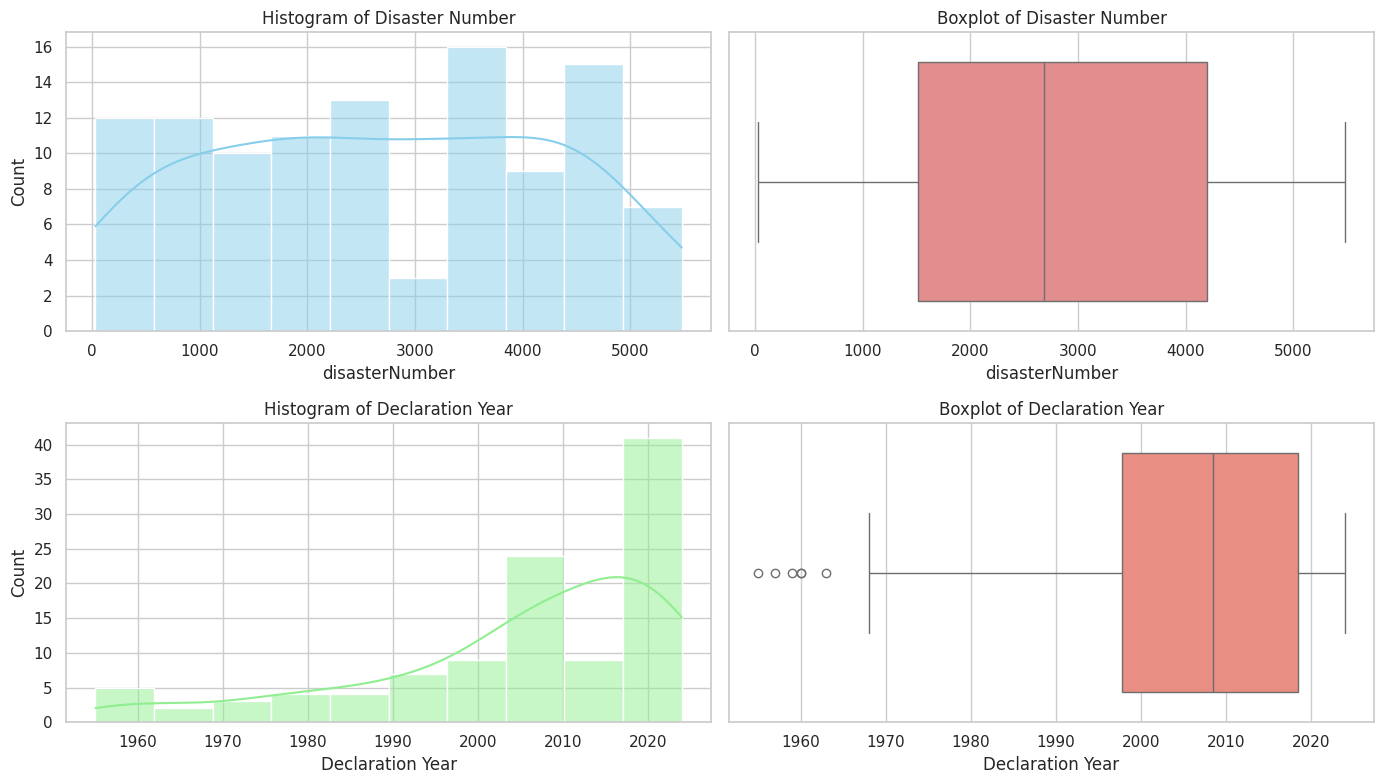

In [7]:
# Plot histograms and boxplots for 'Disaster Number' and 'Declaration Year'
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
sns.histplot(disaster_data['disasterNumber'], bins=10, kde=True, color='skyblue')
plt.title("Histogram of Disaster Number")

plt.subplot(2, 2, 2)
sns.boxplot(x=disaster_data['disasterNumber'], color='lightcoral')
plt.title("Boxplot of Disaster Number")

plt.subplot(2, 2, 3)
sns.histplot(disaster_data['Declaration Year'], bins=10, kde=True, color='lightgreen')
plt.title("Histogram of Declaration Year")

plt.subplot(2, 2, 4)
sns.boxplot(x=disaster_data['Declaration Year'], color='salmon')
plt.title("Boxplot of Declaration Year")

plt.tight_layout()
plt.show()

# Segment 6: Cleaning and Preparing Air Travel Data

In [8]:
# Standardize month abbreviations and combine 'Year' and 'Month' columns into 'Date'
month_corrections = {'Jan.': 'Jan', 'Apr 3/': 'Apr', 'June': 'Jun', 'July': 'Jul', 'Aug.': 'Aug', 'Sept.': 'Sep', 'Oct.': 'Oct', 'Nov.': 'Nov', 'Dec.': 'Dec'}
air_travel_data['Month'] = air_travel_data['Month'].replace(month_corrections)
air_travel_data['Date'] = pd.to_datetime(air_travel_data['Year'].astype(str) + '-' + air_travel_data['Month'], format='%Y-%b')
air_travel_data.drop(columns=['Year', 'Month'], inplace=True)
air_travel_data.sort_values(by='Date', inplace=True)


# Segment 7: Visualizing Air Travel Data

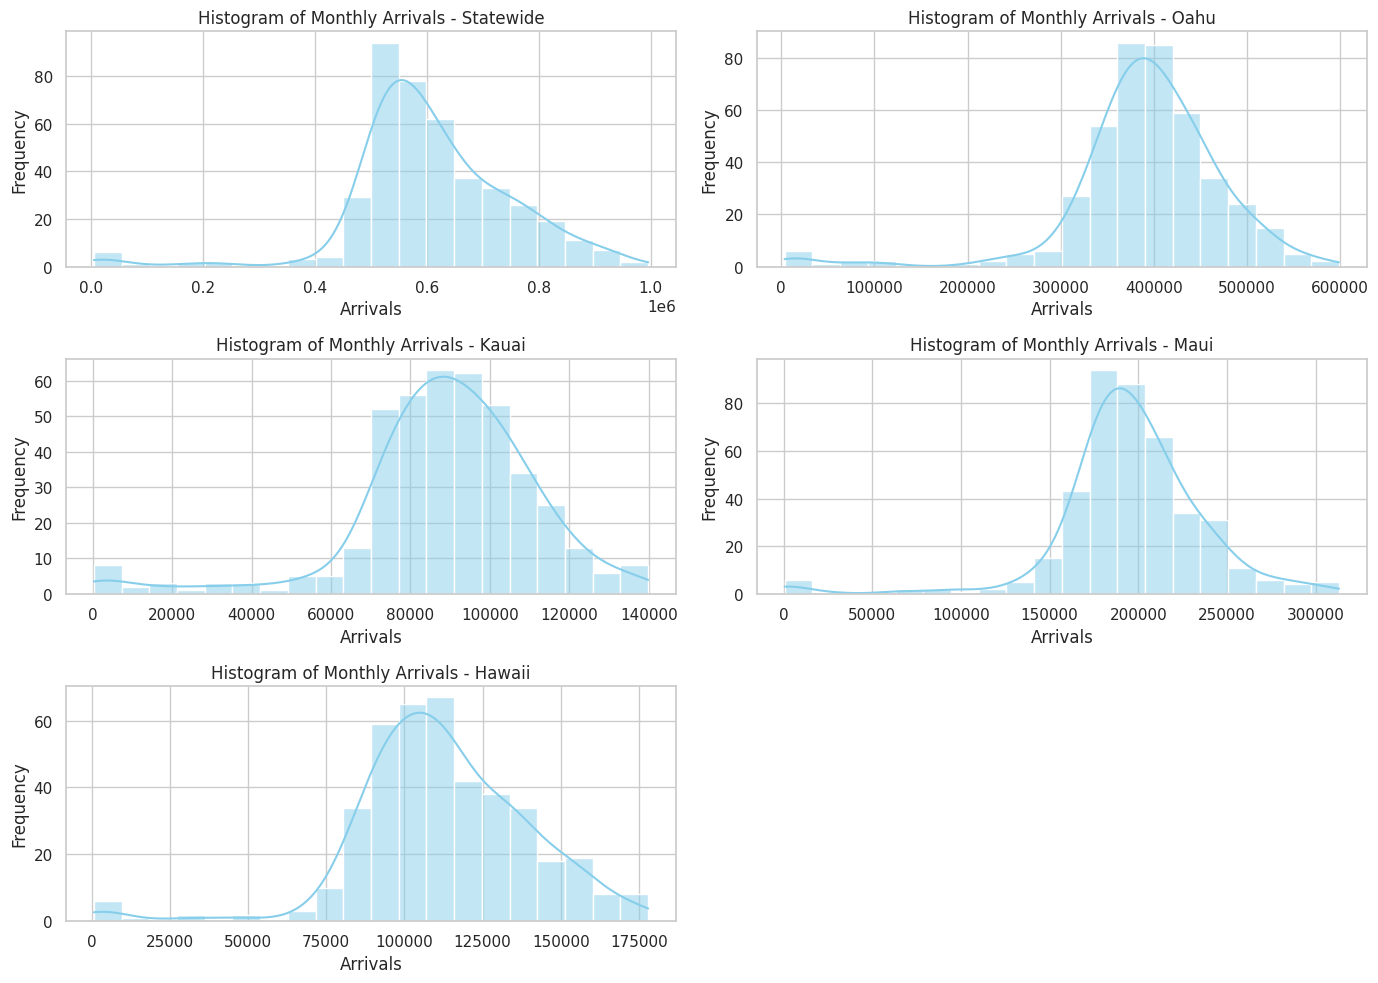

In [ ]:
# Define the correct columns based on actual column names in air_travel_data
columns_to_plot = ['Air travel - Statewide', 'Air travel - Oahu', 'Air travel - Kauai', 'Air travel - Maui', 'Air travel - Hawaii']

# Set up the plot
plt.figure(figsize=(14, 10))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.histplot(air_travel_data[column], bins=20, kde=True, color='skyblue')
    # Extract the region name from the column name for the title
    region_name = column.replace('Air travel - ', '')
    plt.title(f"Histogram of Monthly Arrivals - {region_name}")
    plt.xlabel("Arrivals")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


# Segment 8: Cleaning and Visualizing Hotel Performance Data

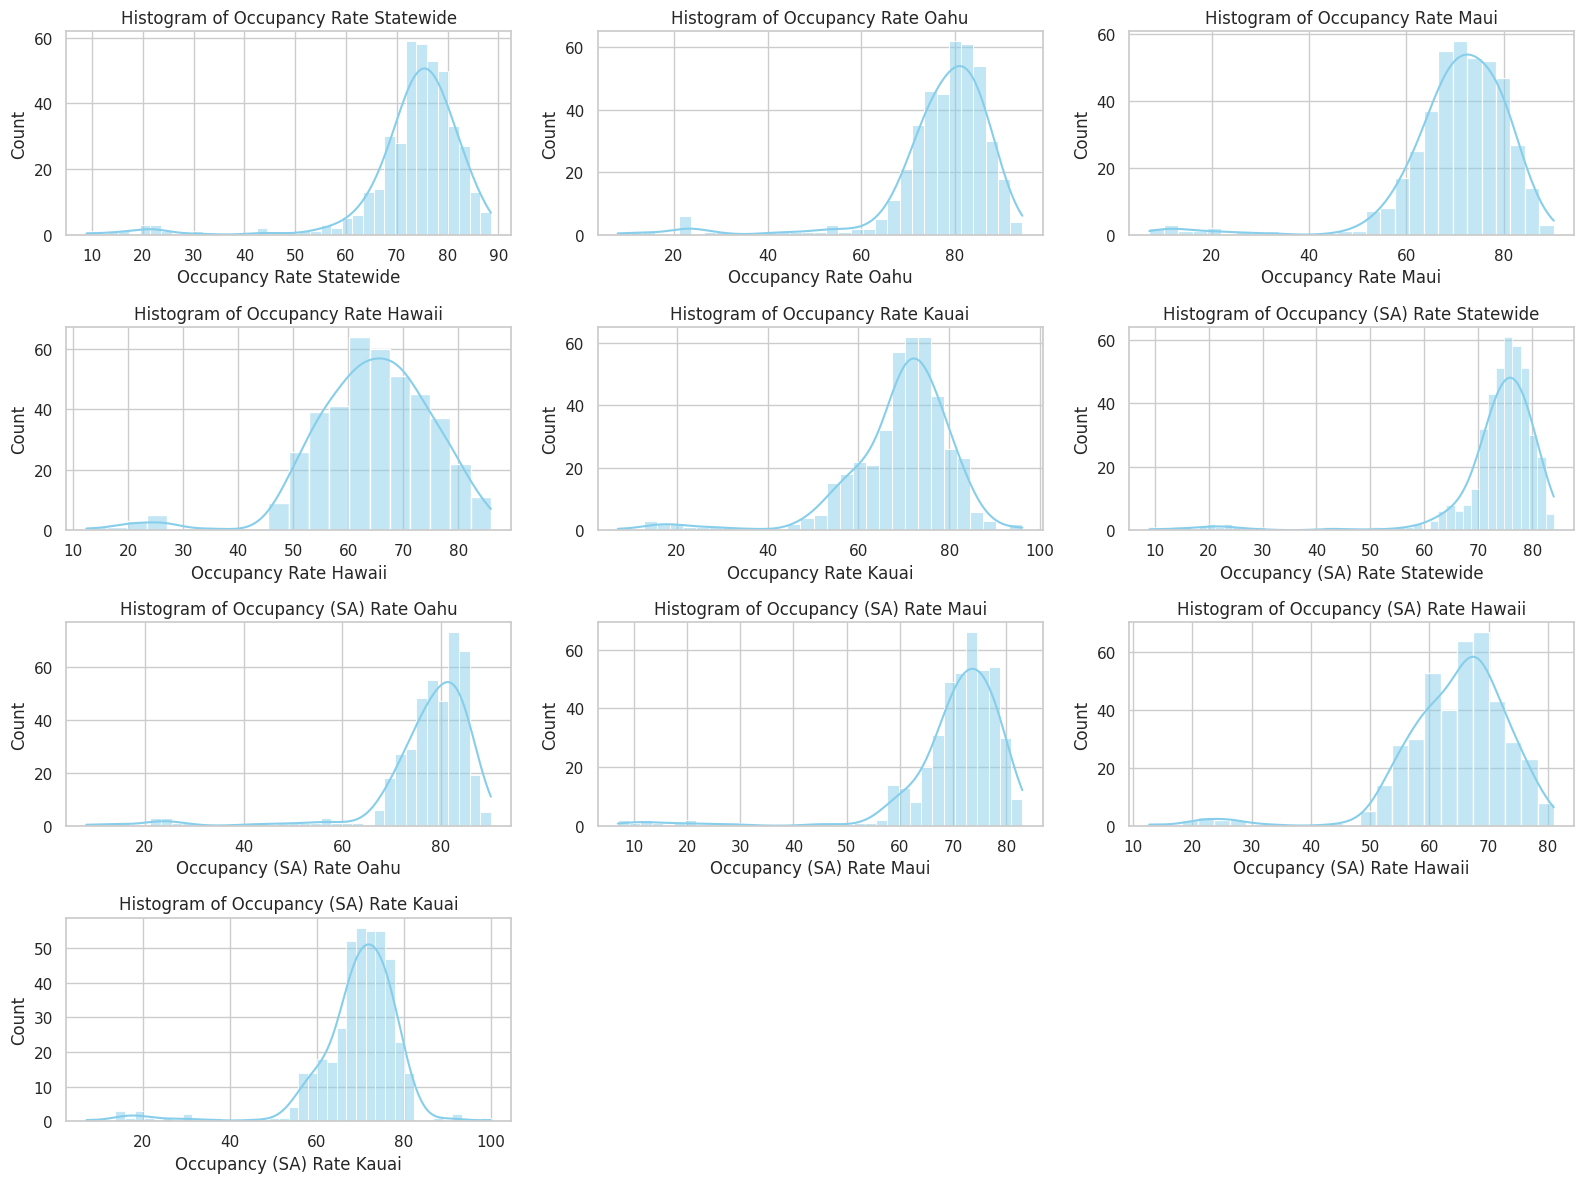

In [ ]:
def visualize_occupancy_rates(df):
    occupancy_columns = [col for col in df.columns if 'Occupancy' in col]
    plt.figure(figsize=(16, 12))
    for i, column in enumerate(occupancy_columns, 1):
        plt.subplot(4, 3, i)
        sns.histplot(df[column], kde=True, color='skyblue')
        plt.title(f"Histogram of {column}")

    plt.tight_layout()
    plt.show()

visualize_occupancy_rates(hotel_performance_data)


# Segment 9: Loading and Visualizing Merged Data

<ipython-input-26-2df3cb87284b>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data['Date'] = pd.to_datetime(merged_data['Year'].astype(str) + '-' + merged_data['Month'], errors='coerce')


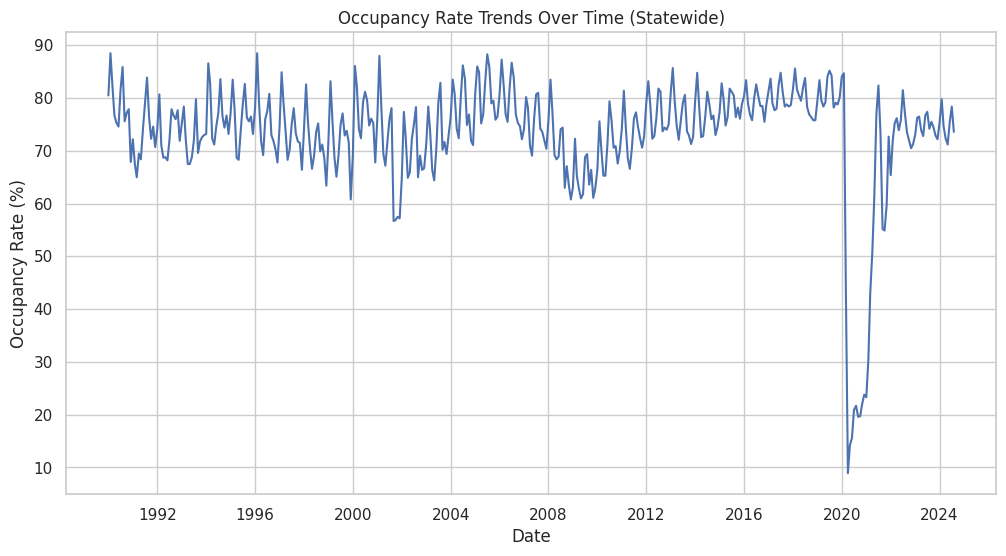

In [ ]:
merged_data = pd.read_excel(merged_data_path)
merged_data['Date'] = pd.to_datetime(merged_data['Year'].astype(str) + '-' + merged_data['Month'], errors='coerce')
merged_data.dropna(subset=['Date'], inplace=True)
merged_data['Occupancy Rate Statewide'] = pd.to_numeric(merged_data['Occupancy Rate Statewide'], errors='coerce')

# Plot occupancy rate over time
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Date'], merged_data['Occupancy Rate Statewide'])
plt.title("Occupancy Rate Trends Over Time (Statewide)")
plt.xlabel("Date")
plt.ylabel("Occupancy Rate (%)")
plt.grid(True)
plt.show()


# Segment 10: Seasonal Trends Analysis

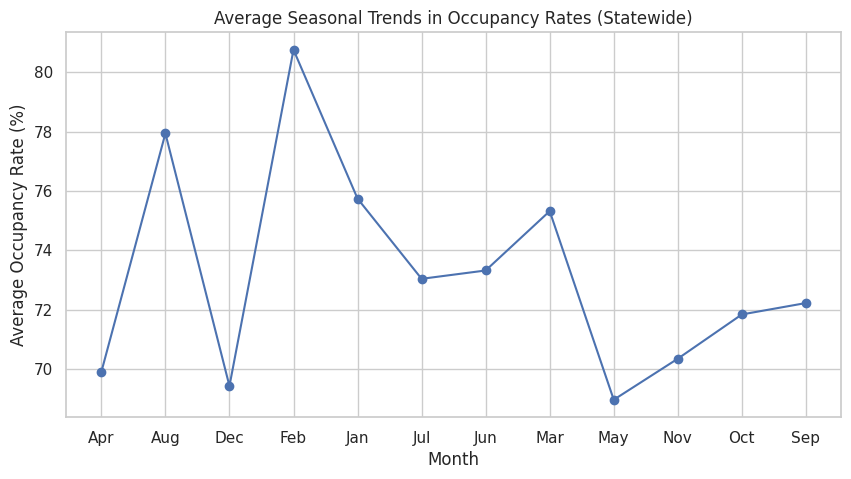

In [ ]:
monthly_seasonal_trends = merged_data.groupby('Month')['Occupancy Rate Statewide'].mean()
plt.figure(figsize=(10, 5))
plt.plot(monthly_seasonal_trends.index, monthly_seasonal_trends.values, marker='o', linestyle='-', color='b')
plt.title("Average Seasonal Trends in Occupancy Rates (Statewide)")
plt.xlabel("Month")
plt.ylabel("Average Occupancy Rate (%)")
plt.grid(True)
plt.show()

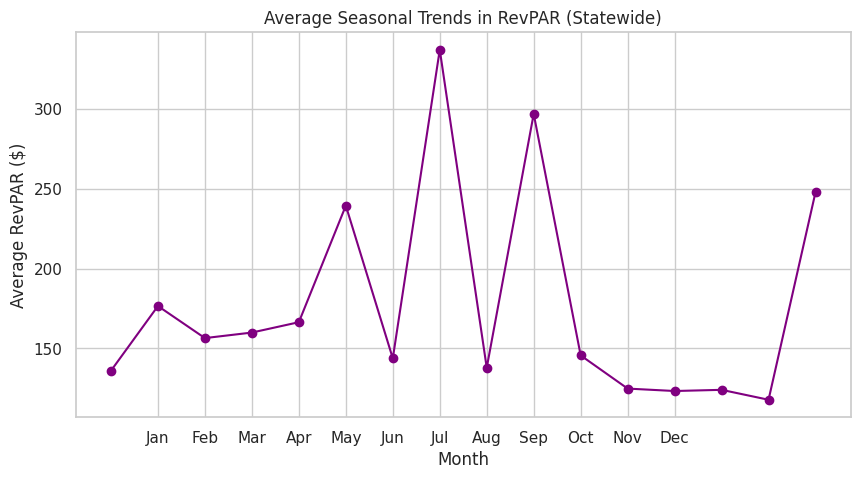

In [4]:
# Group by month to calculate the average RevPAR across all years for each month
monthly_revpar_trends = merged_data.groupby('Month')['RevPAR - dollar - Statewide'].mean()

# Plot the seasonal trends for RevPAR
plt.figure(figsize=(10, 5))
plt.plot(monthly_revpar_trends.index, monthly_revpar_trends.values, marker='o', linestyle='-', color='purple')
plt.title("Average Seasonal Trends in RevPAR (Statewide)")
plt.xlabel("Month")
plt.ylabel("Average RevPAR ($)")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

# Segment 11: Disaster Impact Analysis

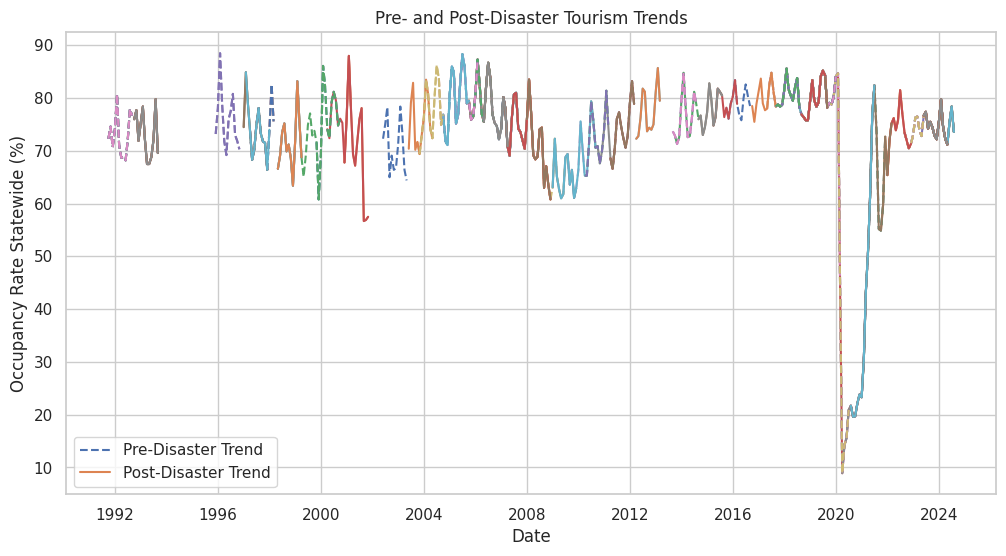

In [ ]:
pre_disaster_period = pd.DateOffset(years=1)
post_disaster_period = pd.DateOffset(years=1)
pre_disaster_trends, post_disaster_trends = [], []

for _, disaster in disaster_data.iterrows():
    disaster_begin = disaster['Incident Begin Date']
    disaster_end = disaster['Incident End Date']
    pre_disaster_start = disaster_begin - pre_disaster_period
    post_disaster_end = disaster_end + post_disaster_period
    pre_disaster_trend = merged_data[(merged_data['Date'] >= pre_disaster_start) & (merged_data['Date'] < disaster_begin)]
    post_disaster_trend = merged_data[(merged_data['Date'] > disaster_end) & (merged_data['Date'] <= post_disaster_end)]
    pre_disaster_trends.append(pre_disaster_trend[['Date', 'Occupancy Rate Statewide']])
    post_disaster_trends.append(post_disaster_trend[['Date', 'Occupancy Rate Statewide']])

plt.figure(figsize=(12, 6))
for pre_trend, post_trend in zip(pre_disaster_trends, post_disaster_trends):
    plt.plot(pre_trend['Date'], pre_trend['Occupancy Rate Statewide'], label='Pre-Disaster Trend', linestyle='--')
    plt.plot(post_trend['Date'], post_trend['Occupancy Rate Statewide'], label='Post-Disaster Trend', linestyle='-')
plt.title('Pre- and Post-Disaster Tourism Trends')
plt.xlabel('Date')
plt.ylabel('Occupancy Rate Statewide (%)')
plt.legend(['Pre-Disaster Trend', 'Post-Disaster Trend'])
plt.show()

# Segment 12: County-Level Analysis

<ipython-input-11-707fa1500823>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df[year_col].astype(str) + '-' + df[month_col], errors='coerce')
<ipython-input-11-707fa1500823>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df[year_col].astype(str) + '-' + df[month_col], errors='coerce')
<ipython-input-11-707fa1500823>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df[year_col].astype(str) + '-' + df[month_col], errors='coerce')
<ipython-input-11-707fa1500823>:4: UserWarning: Could not 

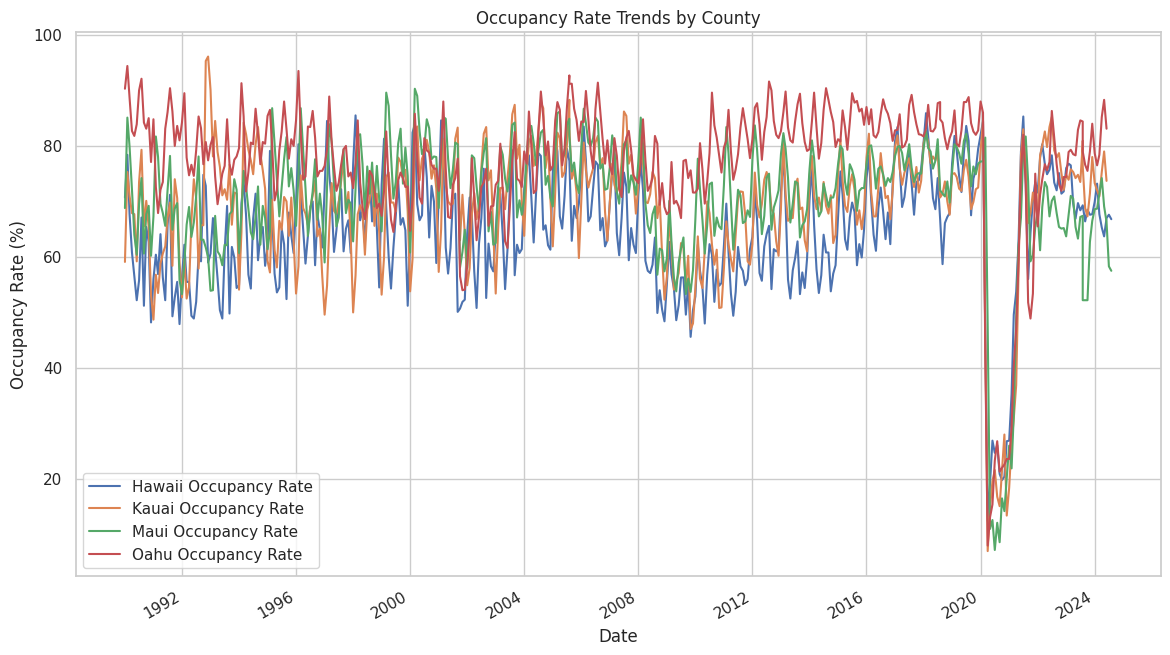

In [11]:
# Ensure 'Date' column exists in each dataset by creating it if necessary
def add_date_column(df, year_col='Year', month_col='Month'):
    if 'Date' not in df.columns:
        df['Date'] = pd.to_datetime(df[year_col].astype(str) + '-' + df[month_col], errors='coerce')

# Apply the function to each dataset
add_date_column(hawaii_data)
add_date_column(kauai_data)
add_date_column(maui_data)
add_date_column(oahu_data)

# Now combine and plot occupancy data by county
occupancy_data = pd.DataFrame({
    'Date': hawaii_data['Date'],
    'Hawaii Occupancy Rate': hawaii_data['Occupancy Rate Hawaii'],
    'Kauai Occupancy Rate': kauai_data['Occupancy Rate Kauai'],
    'Maui Occupancy Rate': maui_data['Occupancy Rate Maui'],
    'Oahu Occupancy Rate': oahu_data['Occupancy Rate Oahu']
})

# Ensure Date is set as the index for plotting
occupancy_data.set_index('Date', inplace=True)

# Plot the occupancy trends
occupancy_data.plot(figsize=(14, 8))
plt.title("Occupancy Rate Trends by County")
plt.ylabel("Occupancy Rate (%)")
plt.xlabel("Date")
plt.show()


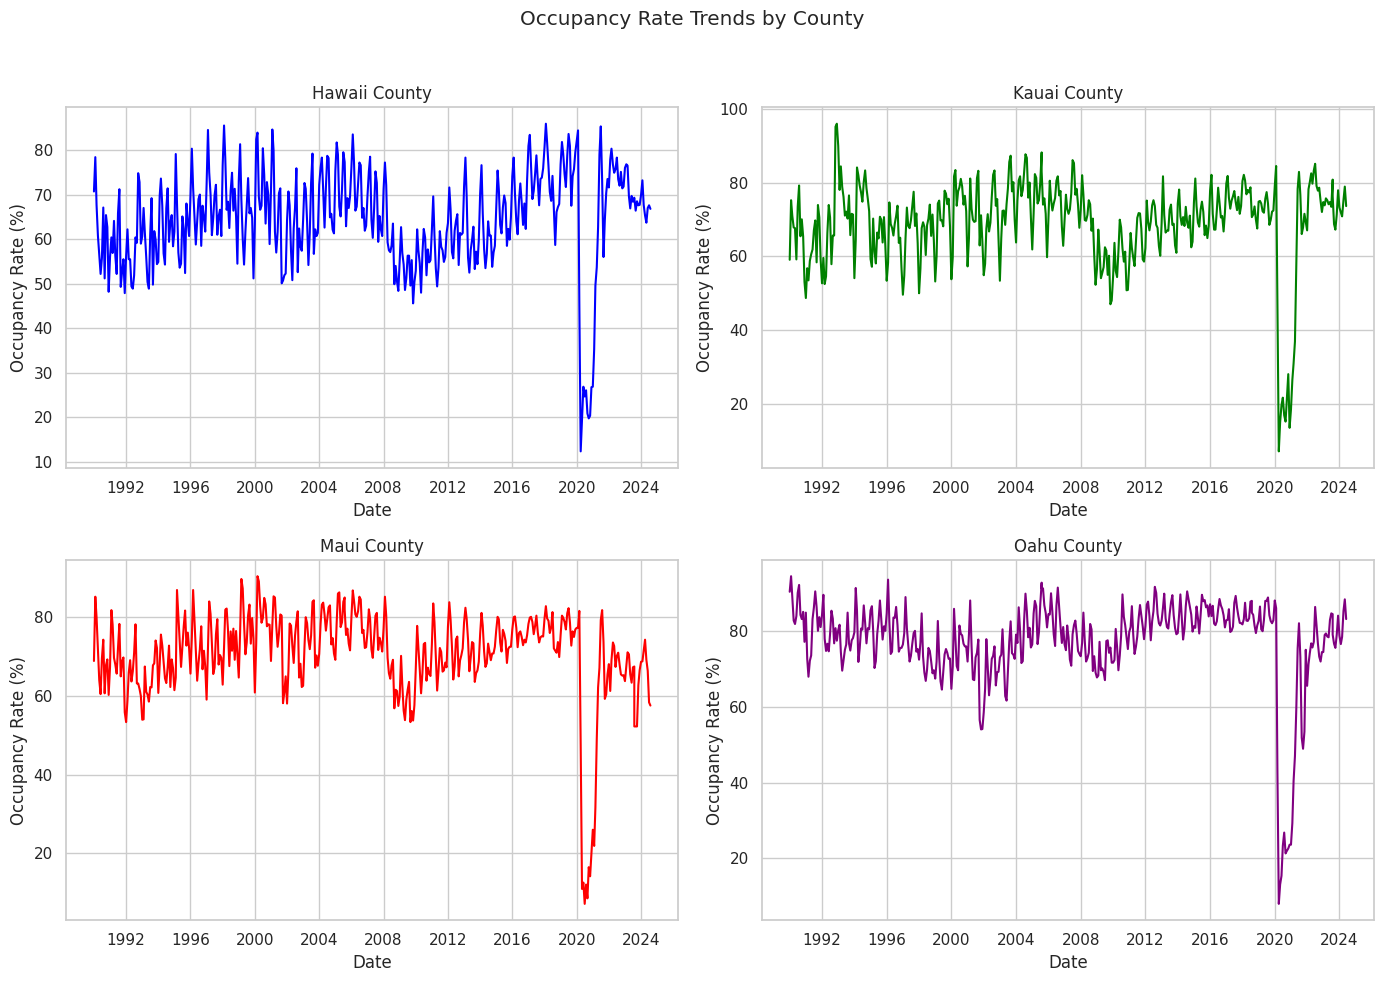

In [12]:
# Extract relevant columns for occupancy rate comparison and merge into a single DataFrame
occupancy_data = pd.DataFrame({
    'Date': hawaii_data['Date'],
    'Hawaii Occupancy Rate': hawaii_data['Occupancy Rate Hawaii'],
    'Kauai Occupancy Rate': kauai_data['Occupancy Rate Kauai'],
    'Maui Occupancy Rate': maui_data['Occupancy Rate Maui'],
    'Oahu Occupancy Rate': oahu_data['Occupancy Rate Oahu']
})

# Set 'Date' as index for better alignment in time series plotting
occupancy_data.set_index('Date', inplace=True)

# Set up a 2x2 grid for side-by-side plots of each county's occupancy rate
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Occupancy Rate Trends by County')

# Plot for Hawaii County
axs[0, 0].plot(occupancy_data.index, occupancy_data['Hawaii Occupancy Rate'], color='blue')
axs[0, 0].set_title('Hawaii County')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Occupancy Rate (%)')

# Plot for Kauai County
axs[0, 1].plot(occupancy_data.index, occupancy_data['Kauai Occupancy Rate'], color='green')
axs[0, 1].set_title('Kauai County')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Occupancy Rate (%)')

# Plot for Maui County
axs[1, 0].plot(occupancy_data.index, occupancy_data['Maui Occupancy Rate'], color='red')
axs[1, 0].set_title('Maui County')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Occupancy Rate (%)')

# Plot for Oahu County
axs[1, 1].plot(occupancy_data.index, occupancy_data['Oahu Occupancy Rate'], color='purple')
axs[1, 1].set_title('Oahu County')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Occupancy Rate (%)')

# Adjust layout for clarity
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


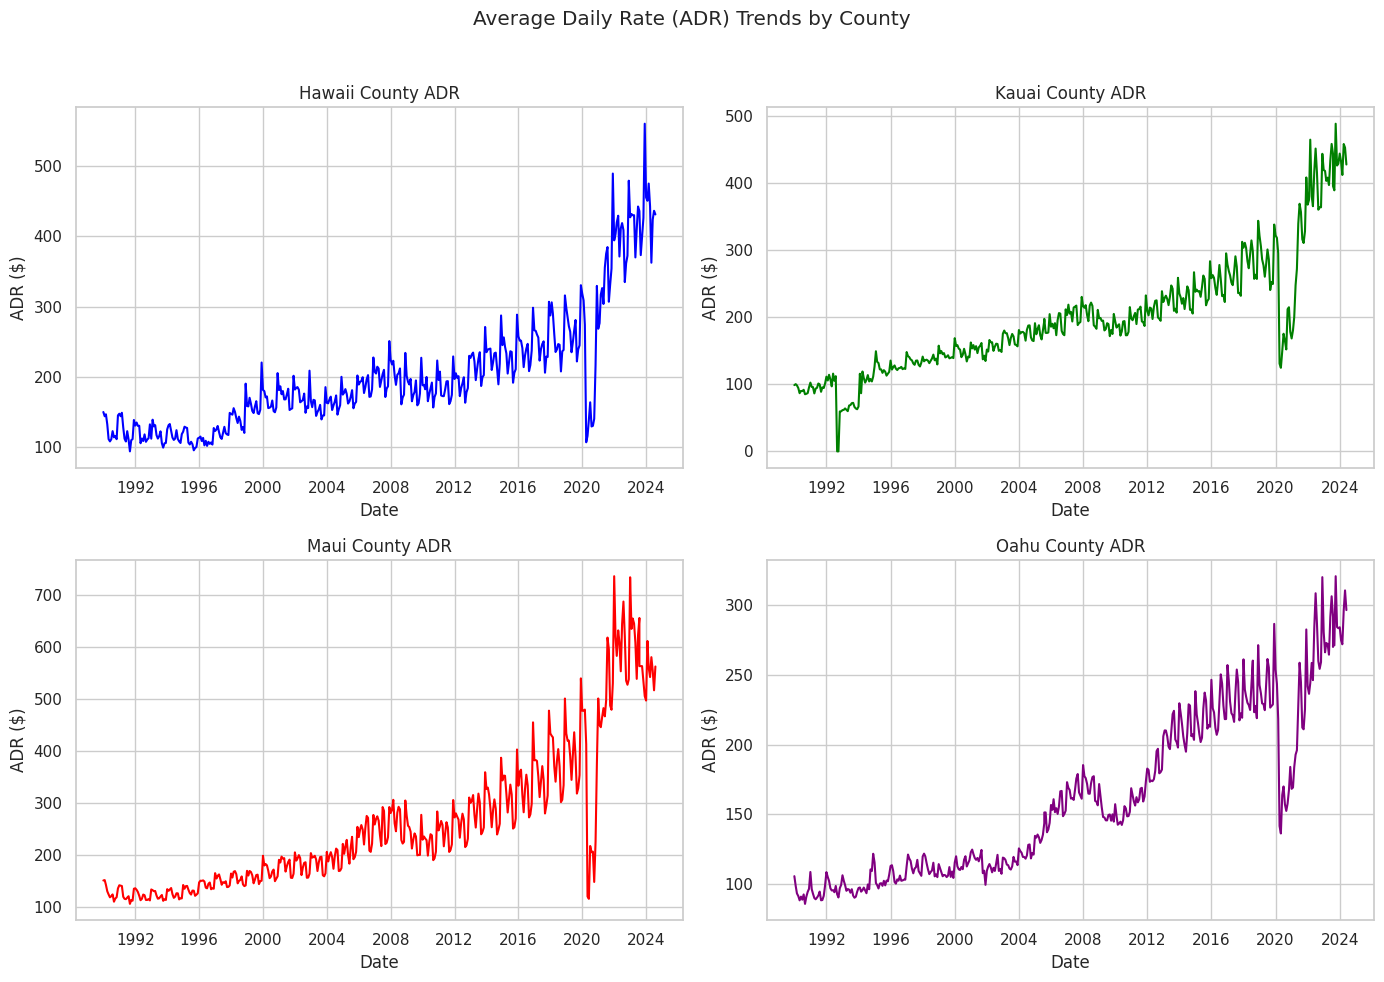

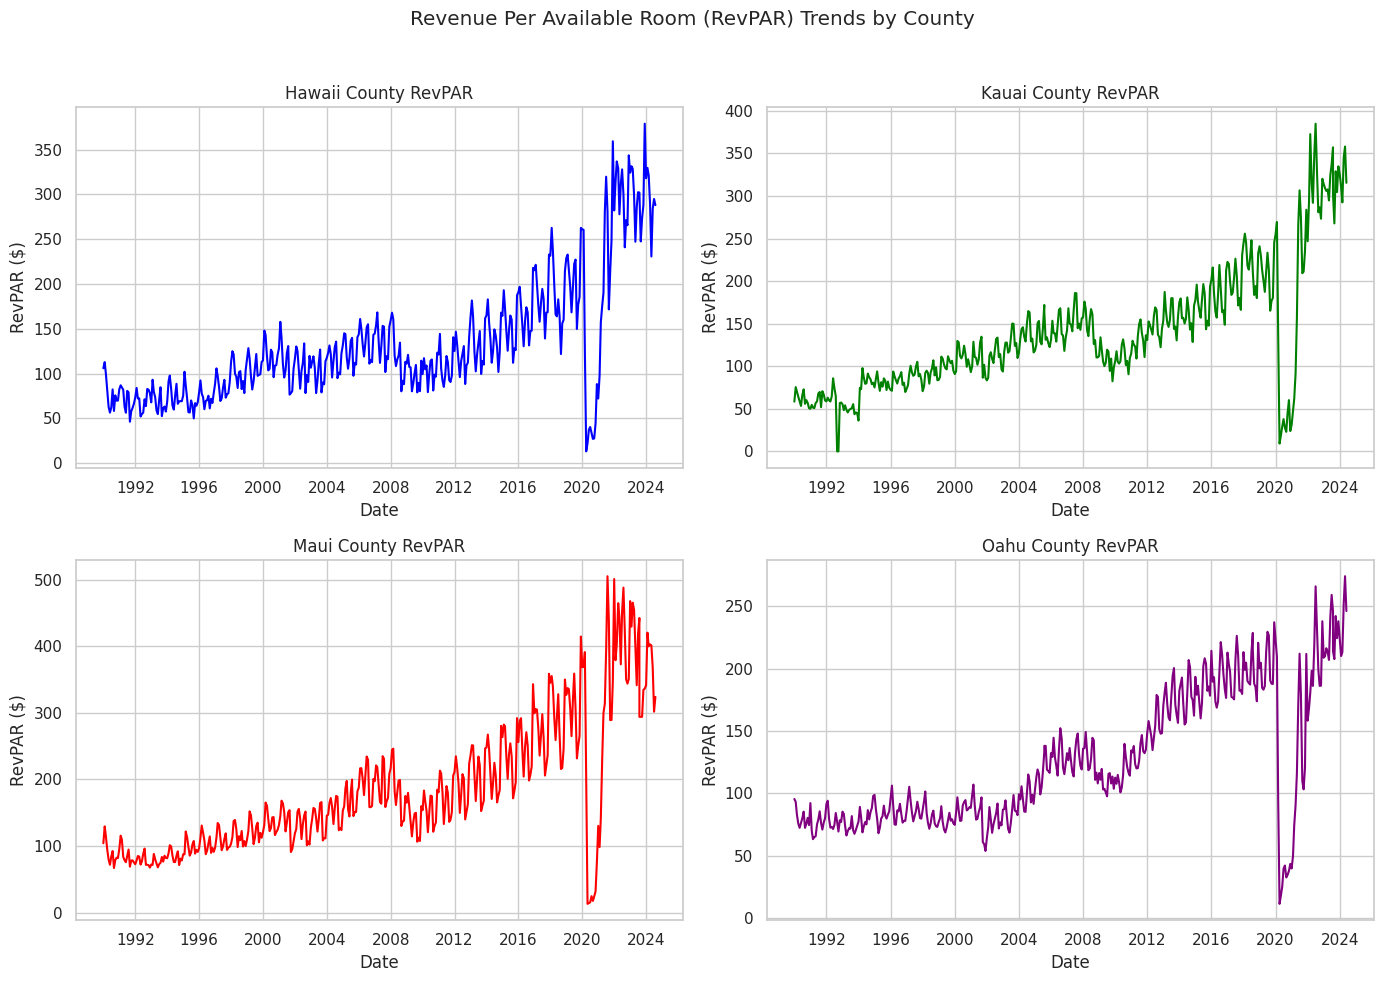

In [13]:
# Extract relevant columns for ADR and RevPAR using confirmed column names
adr_data = pd.DataFrame({
    'Date': hawaii_data['Date'],
    'Hawaii ADR': hawaii_data['Avg daily rate - dollar - Hawaii'],
    'Kauai ADR': kauai_data['Avg daily rate - dollar - Kauai'],
    'Maui ADR': maui_data['Avg daily rate - dollar - Maui'],
    'Oahu ADR': oahu_data['Avg daily rate - dollar - Oahu']
}).set_index('Date')

revpar_data = pd.DataFrame({
    'Date': hawaii_data['Date'],
    'Hawaii RevPAR': hawaii_data['RevPAR - dollar - Hawaii'],
    'Kauai RevPAR': kauai_data['RevPAR - dollar - Kauai'],
    'Maui RevPAR': maui_data['RevPAR - dollar - Maui'],
    'Oahu RevPAR': oahu_data['RevPAR - dollar - Oahu']
}).set_index('Date')

# Plot ADR for each county
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Average Daily Rate (ADR) Trends by County')

# Hawaii County ADR
axs[0, 0].plot(adr_data.index, adr_data['Hawaii ADR'], color='blue')
axs[0, 0].set_title('Hawaii County ADR')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('ADR ($)')

# Kauai County ADR
axs[0, 1].plot(adr_data.index, adr_data['Kauai ADR'], color='green')
axs[0, 1].set_title('Kauai County ADR')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('ADR ($)')

# Maui County ADR
axs[1, 0].plot(adr_data.index, adr_data['Maui ADR'], color='red')
axs[1, 0].set_title('Maui County ADR')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('ADR ($)')

# Oahu County ADR
axs[1, 1].plot(adr_data.index, adr_data['Oahu ADR'], color='purple')
axs[1, 1].set_title('Oahu County ADR')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('ADR ($)')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Plot RevPAR for each county
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Revenue Per Available Room (RevPAR) Trends by County')

# Hawaii County RevPAR
axs[0, 0].plot(revpar_data.index, revpar_data['Hawaii RevPAR'], color='blue')
axs[0, 0].set_title('Hawaii County RevPAR')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('RevPAR ($)')

# Kauai County RevPAR
axs[0, 1].plot(revpar_data.index, revpar_data['Kauai RevPAR'], color='green')
axs[0, 1].set_title('Kauai County RevPAR')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('RevPAR ($)')

# Maui County RevPAR
axs[1, 0].plot(revpar_data.index, revpar_data['Maui RevPAR'], color='red')
axs[1, 0].set_title('Maui County RevPAR')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('RevPAR ($)')

# Oahu County RevPAR
axs[1, 1].plot(revpar_data.index, revpar_data['Oahu RevPAR'], color='purple')
axs[1, 1].set_title('Oahu County RevPAR')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('RevPAR ($)')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# Segment 13: Month Standardization and Data Merging

In [ ]:
# Clean the column names to remove leading/trailing spaces
hotel_performance_data.columns = hotel_performance_data.columns.str.strip()
air_travel_data.columns = air_travel_data.columns.str.strip()
disaster_data.columns = disaster_data.columns.str.strip()

# Define a dictionary to standardize month names to abbreviated format
month_map = {
    'January': 'Jan', 'February': 'Feb', 'March': 'Mar', 'April': 'Apr', 'May': 'May',
    'June': 'Jun', 'July': 'Jul', 'August': 'Aug', 'September': 'Sep', 'October': 'Oct',
    'November': 'Nov', 'December': 'Dec', 'Jan.': 'Jan', 'Feb.': 'Feb', 'Mar.': 'Mar',
    'Apr 3/': 'Apr', 'Aug.': 'Aug', 'Sept.': 'Sep', 'Oct.': 'Oct', 'Nov.': 'Nov', 'Dec.': 'Dec'
}

# Function to standardize month names using the mapping
def standardize_month(month):
    # If the month exists in the mapping, replace it, otherwise keep it as is
    return month_map.get(month, month)

# Clean and filter relevant columns from each dataset
disaster_cleaned = disaster_data[['State', 'Declaration Year', 'Declaration Type', 'Incident Type',
                                          'Incident Begin Date', 'Incident End Date', 'Designated Area(County)']]

# Standardize 'Month' in hotel performance data
hotel_performance_cleaned = hotel_performance_data[['Year', 'Month',
                                                    'Occupancy Rate Statewide',
                                                    'Avg daily rate - dollar - Statewide',
                                                    'RevPAR - dollar - Statewide']]

# Standardize 'Month' in hotel performance data
hotel_performance_cleaned['Month'] = hotel_performance_cleaned['Month'].apply(standardize_month)

# Standardize 'Month' in air travel data
air_travel_cleaned = air_travel_data[['Year', 'Month', 'Air travel - Statewide']]
air_travel_cleaned['Month'] = air_travel_cleaned['Month'].apply(standardize_month)

# Convert the 'Incident Begin Date' to datetime and extract year and month as abbreviated names
disaster_cleaned['Incident Begin Date'] = pd.to_datetime(disaster_cleaned['Incident Begin Date'])
disaster_cleaned['Year'] = disaster_cleaned['Incident Begin Date'].dt.year
disaster_cleaned['Month'] = disaster_cleaned['Incident Begin Date'].dt.strftime('%b')  # Abbreviated month name

# Merge hotel performance data with disaster data based on Year, Month, and County
final_merge = pd.merge(hotel_performance_cleaned, disaster_cleaned, how='left', on=['Year', 'Month'])

# Merge the air travel data
final_merge = pd.merge(final_merge, air_travel_cleaned, how='left', on=['Year', 'Month'])

# Save the final merged file
final_merge.to_excel('Final_Merged_Statewide.xlsx', index=False)

# Display the first few rows to check the merge
print(final_merge.head())


   Year Month  Occupancy Rate Statewide  Avg daily rate - dollar - Statewide  \
0  1990   Jan                      80.5                               117.47   
1  1990   Feb                      88.5                               113.31   
2  1990   Mar                      82.6                               107.42   
3  1990   Apr                      76.7                               102.08   
4  1990   May                      75.3                                96.11   

   RevPAR - dollar - Statewide State  Declaration Year Declaration Type  \
0                        94.56   NaN               NaN              NaN   
1                       100.28   NaN               NaN              NaN   
2                        88.73   NaN               NaN              NaN   
3                        78.30   NaN               NaN              NaN   
4                        72.37   NaN               NaN              NaN   

  Incident Type Incident Begin Date Incident End Date Designated Are

<ipython-input-59-3b9cfcab27a8>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_performance_cleaned['Month'] = hotel_performance_cleaned['Month'].apply(standardize_month)
<ipython-input-59-3b9cfcab27a8>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_travel_cleaned['Month'] = air_travel_cleaned['Month'].apply(standardize_month)
<ipython-input-59-3b9cfcab27a8>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

## Segment 14: Collating the Data for Regression

In [ ]:
# Load the dataset
file_path = '/content/drive/MyDrive/hawaii/Final_Merged_Statewide (1).xlsx'
df = pd.read_excel(file_path)

# Convert Month to numeric
month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
             'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
df['Month'] = df['Month'].map(month_map)

# Fill missing values to avoid issues with indicator creation
df['Declaration Type'] = df['Declaration Type'].fillna('None')
df['Incident Type'] = df['Incident Type'].fillna('None')

# Create indicator columns for Declaration Types and Incident Types
declaration_types = ['FM', 'DR', 'EM']
incident_types = ['Fire', 'Flood', 'Severe Storm', 'Biological', 'Hurricane',
                  'Volcanic Eruption', 'Mud/Landslide', 'Tsunami', 'Earthquake',
                  'Typhoon', 'Other']

for decl_type in declaration_types:
    df[decl_type] = df['Declaration Type'].apply(lambda x: 1 if x == decl_type else 0)

for incident_type in incident_types:
    df[incident_type] = df['Incident Type'].apply(lambda x: 1 if x == incident_type else 0)

# Group by Year and Month, aggregate by taking max values for numeric columns and sum for indicators
output_df = df.groupby(['Year', 'Month']).agg({
    'Occupancy Rate Statewide': 'max',
    'Avg daily rate - dollar - Statewide': 'max',
    'RevPAR - dollar - Statewide': 'max',
    'Air travel - Statewide': 'max',
    'FM': 'sum',
    'DR': 'sum',
    'EM': 'sum',
    'Fire': 'sum',
    'Flood': 'sum',
    'Severe Storm': 'sum',
    'Biological': 'sum',
    'Hurricane': 'sum',
    'Volcanic Eruption': 'sum',
    'Mud/Landslide': 'sum',
    'Tsunami': 'sum',
    'Earthquake': 'sum',
    'Typhoon': 'sum',
    'Other': 'sum'
}).reset_index()

# Calculate the total number of disasters
disaster_columns = ['Fire', 'Flood', 'Severe Storm', 'Biological', 'Hurricane',
                    'Volcanic Eruption', 'Mud/Landslide', 'Tsunami', 'Earthquake',
                    'Typhoon', 'Other']
output_df['Total no of Disaster'] = output_df[disaster_columns].sum(axis=1)

# Save the final output to an Excel file
output_path = 'Final_Output_Statewide.xlsx'
output_df.to_excel(output_path, index=False)

print("File saved to:", output_path)


File saved to: Final_Output_Statewide.xlsx


## Segment 15: Future Prediction Evaluation

In [ ]:
# Load the dataset
file_path = '/content/drive/MyDrive/hawaii/Final_Output_Statewide.xlsx'
data = pd.read_excel(file_path)

# Convert Year and Month to datetime for time series analysis
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(Day=1))
data.set_index('Date', inplace=True)

# Split the dataset: 1990-2019 for training and 2022-2023 for evaluation
train_data = data['1990':'2019']
test_data = data['2022':'2024-06']

# Segment 16:Time Series Forecasting

In [ ]:
# Time Series Forecasting
ts_predictions = {}
forecast_index = test_data.index  # Using the index of test_data for alignment

for column in ['Occupancy Rate Statewide', 'Avg daily rate - dollar - Statewide', 'RevPAR - dollar - Statewide', 'Air travel - Statewide']:
    ts_model = ExponentialSmoothing(train_data[column], trend='add', seasonal='add', seasonal_periods=12).fit()
    ts_forecast = ts_model.forecast(steps=len(test_data))
    ts_forecast.index = forecast_index  # Align forecast index with test_data
    ts_predictions[column] = ts_forecast



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


## Segment 17: Regression Modeling


Performance Comparison (2022-2024 Actual vs Predictions):
                      Model                               Target  \
0         Linear Regression             Occupancy Rate Statewide   
1         Linear Regression  Avg daily rate - dollar - Statewide   
2         Linear Regression          RevPAR - dollar - Statewide   
3         Linear Regression               Air travel - Statewide   
4   Decision Tree Regressor             Occupancy Rate Statewide   
5   Decision Tree Regressor  Avg daily rate - dollar - Statewide   
6   Decision Tree Regressor          RevPAR - dollar - Statewide   
7   Decision Tree Regressor               Air travel - Statewide   
8        AdaBoost Regressor             Occupancy Rate Statewide   
9        AdaBoost Regressor  Avg daily rate - dollar - Statewide   
10       AdaBoost Regressor          RevPAR - dollar - Statewide   
11       AdaBoost Regressor               Air travel - Statewide   

             MSE            MAE   R2 Score  
0   2.25747

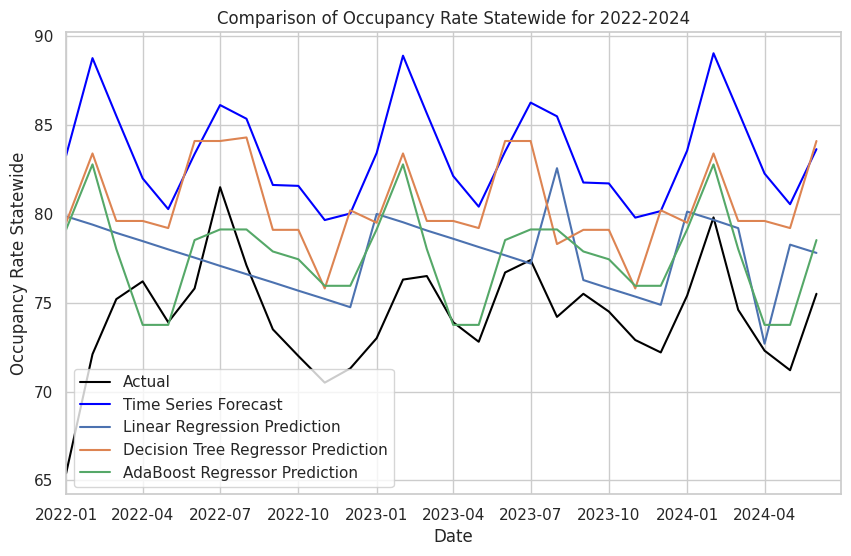

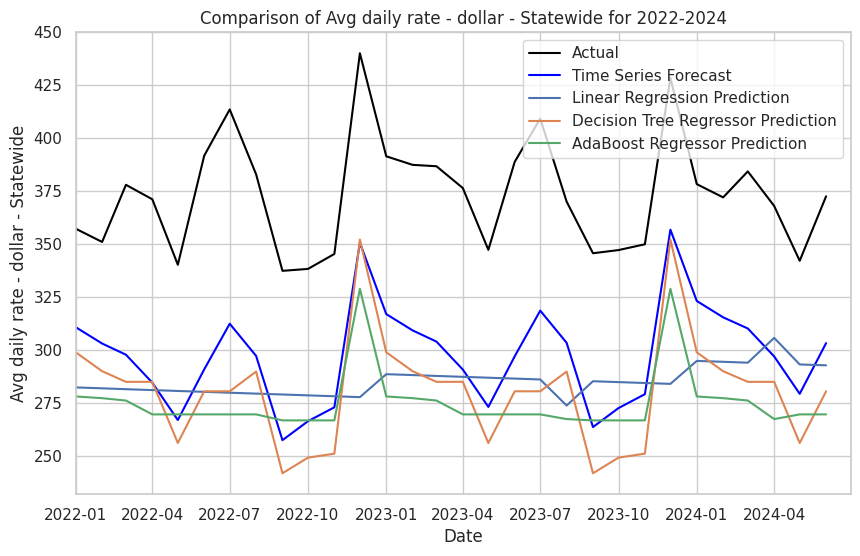

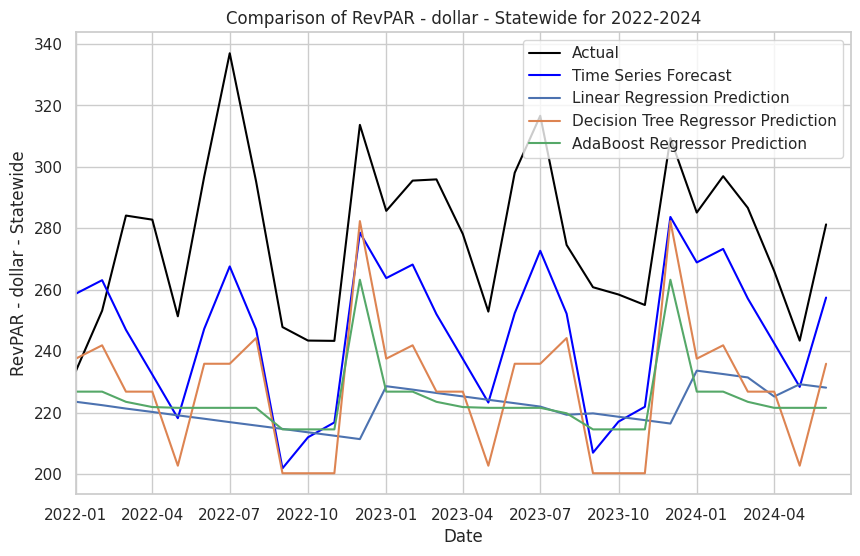

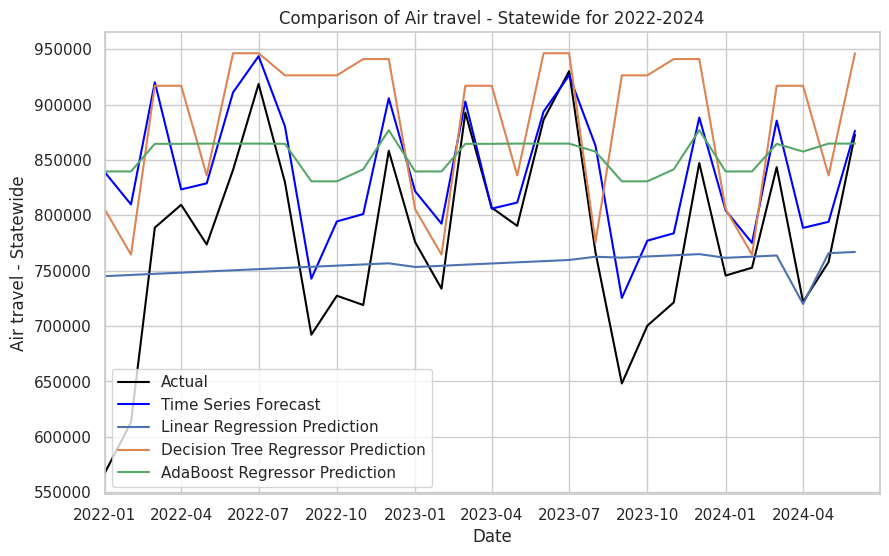

In [ ]:
# Regression Modeling
# Prepare feature set and target variables
X = train_data.drop(columns=['Occupancy Rate Statewide', 'Avg daily rate - dollar - Statewide', 'RevPAR - dollar - Statewide', 'Air travel - Statewide'])
y_occupancy = train_data['Occupancy Rate Statewide']
y_avg_rate = train_data['Avg daily rate - dollar - Statewide']
y_revpar = train_data['RevPAR - dollar - Statewide']
y_air_travel = train_data['Air travel - Statewide']

# Models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'AdaBoost Regressor': AdaBoostRegressor(random_state=42)
}

# Prediction results storage
predictions = {}
actuals = test_data[['Occupancy Rate Statewide', 'Avg daily rate - dollar - Statewide', 'RevPAR - dollar - Statewide', 'Air travel - Statewide']]
performance_results = []

# Train and predict with each model
for name, model in models.items():
    model_predictions = {}
    for target, y_train in zip(['Occupancy Rate Statewide', 'Avg daily rate - dollar - Statewide', 'RevPAR - dollar - Statewide', 'Air travel - Statewide'],
                               [y_occupancy, y_avg_rate, y_revpar, y_air_travel]):
        # Train-test split for model training
        X_train, X_test, y_train, y_test = train_test_split(X, y_train, test_size=0.2, random_state=42)
        model.fit(X_train, y_train)

        # Predict on 2022-2023 data using the trained model
        test_features = test_data.drop(columns=['Occupancy Rate Statewide', 'Avg daily rate - dollar - Statewide', 'RevPAR - dollar - Statewide', 'Air travel - Statewide'])
        future_pred = model.predict(test_features)

        # Store predictions with aligned index
        model_predictions[target] = pd.Series(future_pred, index=forecast_index)

        # Calculate performance metrics and store results
        mse = mean_squared_error(actuals[target], future_pred)
        mae = mean_absolute_error(actuals[target], future_pred)
        r2 = r2_score(actuals[target], future_pred)
        performance_results.append({
            'Model': name,
            'Target': target,
            'MSE': mse,
            'MAE': mae,
            'R2 Score': r2
        })

    predictions[name] = model_predictions

# Comparison of Model Performance
performance_df = pd.DataFrame(performance_results)
print("\nPerformance Comparison (2022-2024 Actual vs Predictions):")
print(performance_df)

# Visualize comparisons for each target variable
for target in actuals.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(actuals.index, actuals[target], label='Actual', color='black')
    plt.plot(ts_predictions[target].index, ts_predictions[target], label='Time Series Forecast', color='blue')
    for model_name in models:
        plt.plot(forecast_index, predictions[model_name][target], label=f'{model_name} Prediction')
    plt.title(f'Comparison of {target} for 2022-2024')
    plt.xlabel('Date')
    plt.ylabel(target)
    plt.xlim(pd.Timestamp('2022-01-01'), pd.Timestamp('2024-06-30'))  # Limit x-axis to 2022-2023
    plt.legend()
    plt.show()


# Segment 17: Disaster Feature Importance Analysis

Calculating feature importance for Occupancy Rate Statewide...



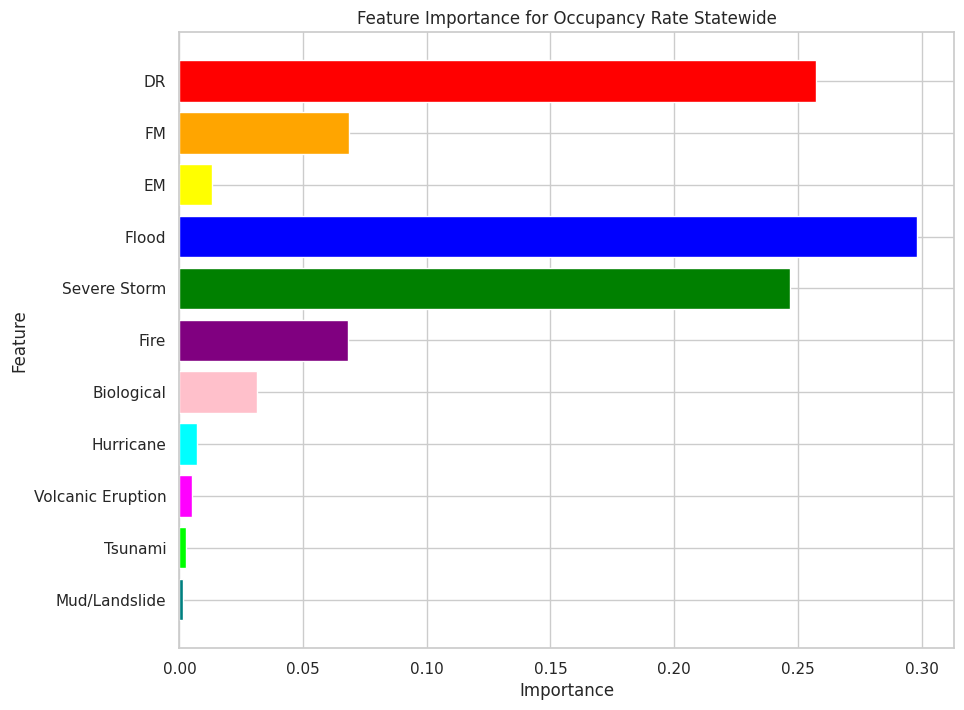

              Feature  Importance    Color
0                  DR    0.257260      red
1                  FM    0.068401   orange
2                  EM    0.013147   yellow
3               Flood    0.298363     blue
4        Severe Storm    0.246932    green
5                Fire    0.068288   purple
6          Biological    0.031294     pink
7           Hurricane    0.007137     cyan
8   Volcanic Eruption    0.004972  magenta
9             Tsunami    0.002747     lime
10      Mud/Landslide    0.001460     teal 

Calculating feature importance for Avg daily rate - dollar - Statewide...



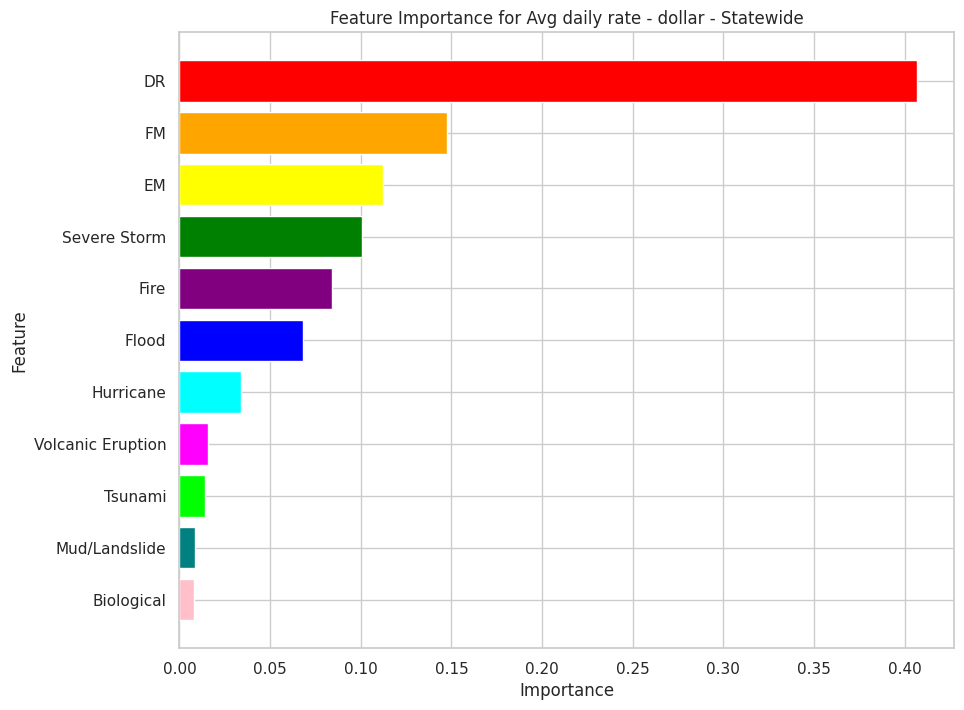

              Feature  Importance    Color
0                  DR    0.407027      red
1                  FM    0.147791   orange
2                  EM    0.112082   yellow
4        Severe Storm    0.100704    green
5                Fire    0.084305   purple
3               Flood    0.067921     blue
7           Hurricane    0.033914     cyan
8   Volcanic Eruption    0.015783  magenta
9             Tsunami    0.014245     lime
10      Mud/Landslide    0.008356     teal
6          Biological    0.007872     pink 

Calculating feature importance for RevPAR - dollar - Statewide...



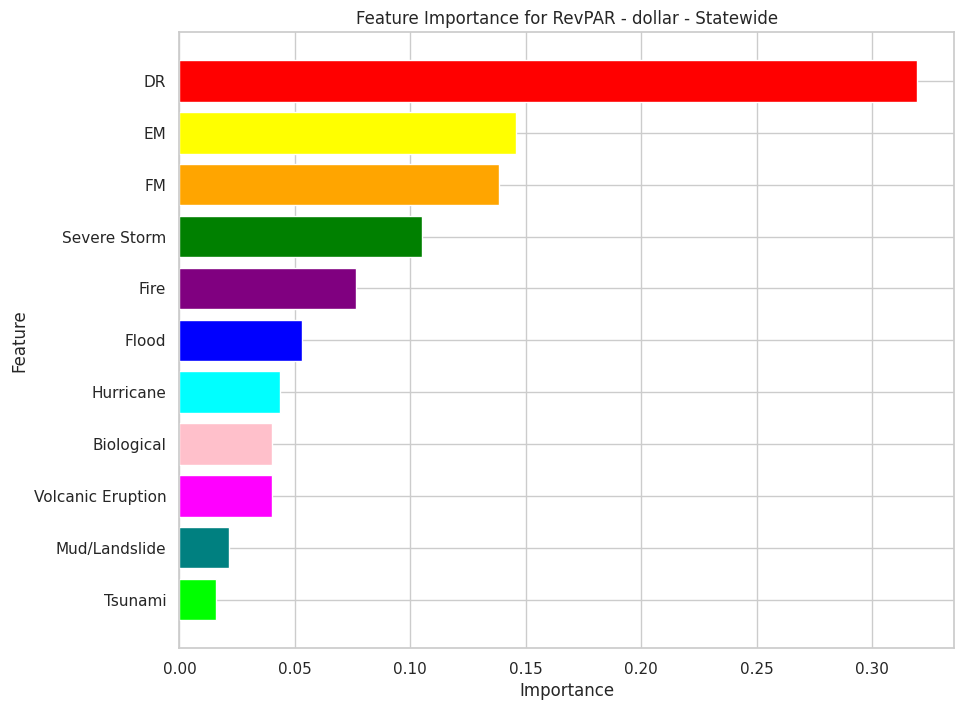

              Feature  Importance    Color
0                  DR    0.319607      red
2                  EM    0.145801   yellow
1                  FM    0.138612   orange
4        Severe Storm    0.105244    green
5                Fire    0.076300   purple
3               Flood    0.053001     blue
7           Hurricane    0.043545     cyan
6          Biological    0.040316     pink
8   Volcanic Eruption    0.040139  magenta
10      Mud/Landslide    0.021503     teal
9             Tsunami    0.015932     lime 

Calculating feature importance for Air travel - Statewide...



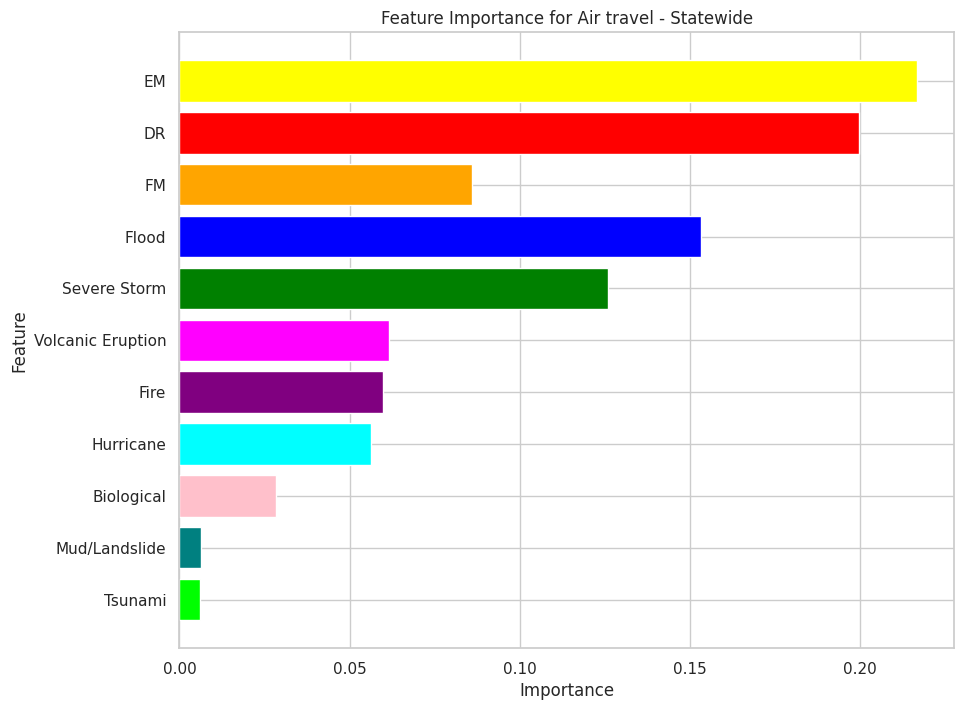

              Feature  Importance    Color
2                  EM    0.216781   yellow
0                  DR    0.199708      red
1                  FM    0.085799   orange
3               Flood    0.153100     blue
4        Severe Storm    0.125966    green
8   Volcanic Eruption    0.061685  magenta
5                Fire    0.059925   purple
7           Hurricane    0.056150     cyan
6          Biological    0.028349     pink
10      Mud/Landslide    0.006354     teal
9             Tsunami    0.006182     lime 



In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Final_Output_Statewide.xlsx'
data = pd.read_excel(file_path, 'Sheet1')

# Define target variables and disaster-related features
target_variables = [
    'Occupancy Rate Statewide',
    'Avg daily rate - dollar - Statewide',
    'RevPAR - dollar - Statewide',
    'Air travel - Statewide'
]

# Define the feature groups
group_1 = ['DR', 'FM', 'EM']
group_2 = [
    'Flood', 'Severe Storm', 'Fire', 'Biological', 'Hurricane',
    'Volcanic Eruption', 'Tsunami', 'Mud/Landslide'
]

# Combine all features in the specified order
disaster_features = group_1 + group_2

# Drop any missing values (if applicable)
data = data.dropna()

# Function to calculate and plot feature importance with group-based color coding
def calculate_and_plot_feature_importance(data, target, features):
    X = data[features]
    y = data[target]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Calculate feature importance
    feature_importances = model.feature_importances_

    # Prepare DataFrame for sorting and color assignment
    importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

    # Set colors for Group 1 (DR, FM, EM) - Red, Orange, Yellow
    group_1_colors = ['red', 'orange', 'yellow']

    # Set colors for Group 2 (Disaster-related features) - Unique colors in specified order
    group_2_colors = [
        'blue', 'green', 'purple', 'pink', 'cyan', 'magenta', 'lime', 'teal'
    ]

    # Assign colors to Group 1 (DR, FM, EM)
    colors = group_1_colors + group_2_colors[:len(group_2)]

    # Add color column to DataFrame
    importance_df['Color'] = colors

    # Sort each group separately in descending order based on feature importance
    # Sort Group 1 (DR, FM, EM)
    group_1_df = importance_df[importance_df['Feature'].isin(group_1)].sort_values(by='Importance', ascending=False)

    # Sort Group 2 (Disaster-related features)
    group_2_df = importance_df[importance_df['Feature'].isin(group_2)].sort_values(by='Importance', ascending=False)

    # Concatenate the sorted groups back together while maintaining group order
    sorted_importance_df = pd.concat([group_1_df, group_2_df])

    # Plot feature importances with group-based color coding
    plt.figure(figsize=(10, 8))
    plt.barh(sorted_importance_df['Feature'], sorted_importance_df['Importance'], color=sorted_importance_df['Color'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(f'Feature Importance for {target}')
    plt.gca().invert_yaxis()
    plt.show()

    return sorted_importance_df

# Calculate and plot feature importance for each target variable
for target in target_variables:
    print(f"Calculating feature importance for {target}...\n")
    feature_importance_df = calculate_and_plot_feature_importance(data, target, disaster_features)
    print(feature_importance_df, "\n")


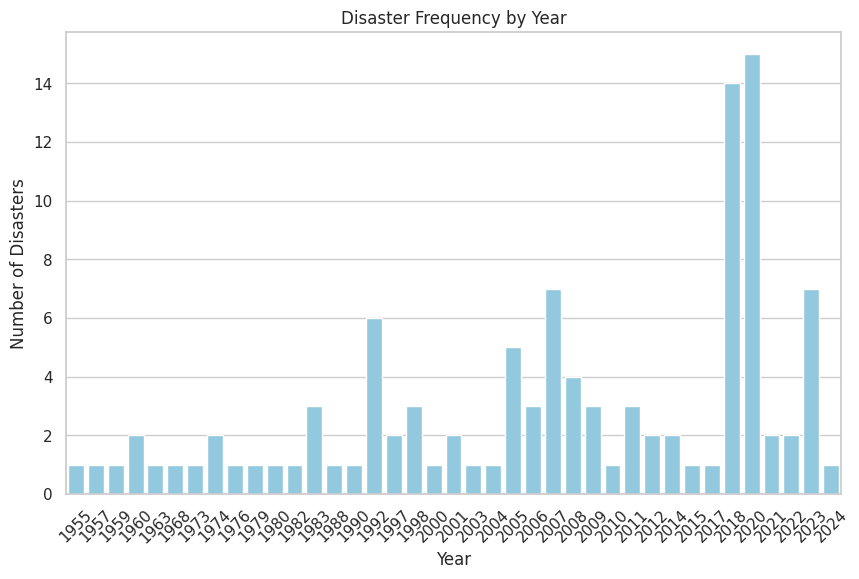

<ipython-input-14-d6f98fdfacb9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Incident Type', data=disaster_data, palette="viridis")


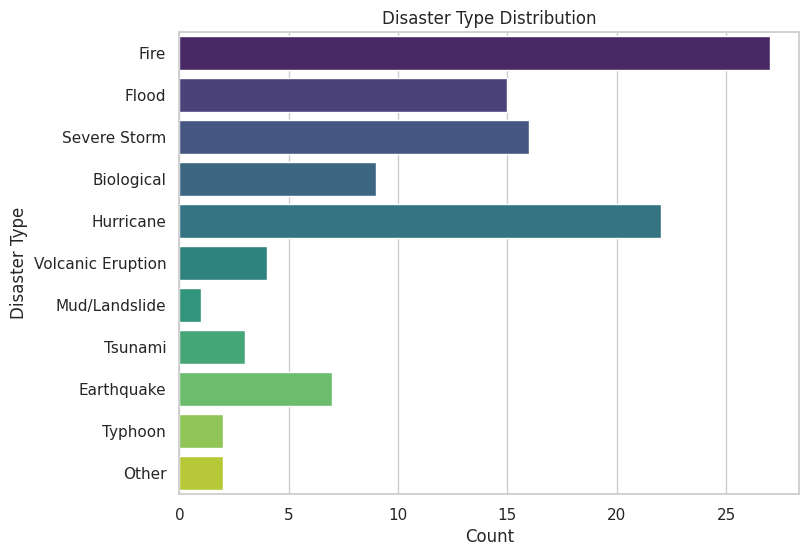

<ipython-input-14-d6f98fdfacb9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Designated Area(County)', data=disaster_data, palette="magma")


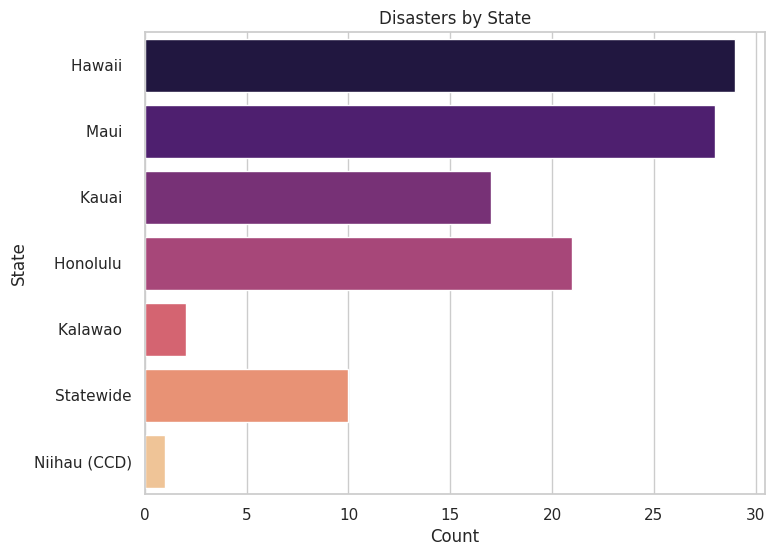

In [14]:
# Step 1: Disaster Count Over Time (by year)
plt.figure(figsize=(10, 6))
sns.countplot(x='Declaration Year', data=disaster_data, color='skyblue')
plt.title("Disaster Frequency by Year")
plt.xlabel("Year")
plt.ylabel("Number of Disasters")
plt.xticks(rotation=45)
plt.show()

# Step 2: Disaster Type Distribution
plt.figure(figsize=(8, 6))
sns.countplot(y='Incident Type', data=disaster_data, palette="viridis")
plt.title("Disaster Type Distribution")
plt.xlabel("Count")
plt.ylabel("Disaster Type")
plt.show()

# Step 3: Regional Impact (Disaster by County)
plt.figure(figsize=(8, 6))
sns.countplot(y='Designated Area(County)', data=disaster_data, palette="magma")
plt.title("Disasters by State")
plt.xlabel("Count")
plt.ylabel("State")
plt.show()

# Segment 18:Yearly Employment Trends Visualization

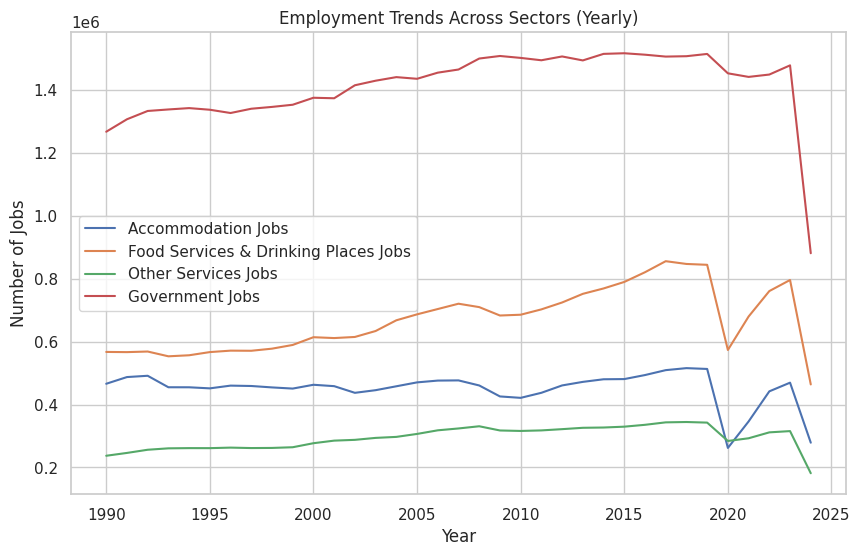

In [ ]:
# Aggregate job counts by year
sector_jobs = ['Accommodation Jobs', 'Food Services & Drinking Places Jobs',
               'Other Services Jobs', 'Government Jobs']
yearly_jobs = data.groupby('Year')[sector_jobs].sum()

# Plot trends
plt.figure(figsize=(10, 6))
for sector in sector_jobs:
    plt.plot(yearly_jobs.index, yearly_jobs[sector], label=sector)

plt.title('Employment Trends Across Sectors (Yearly)')
plt.xlabel('Year')
plt.ylabel('Number of Jobs')
plt.legend()
plt.grid(True)
plt.show()

# Segment 19:Tourism Metrics and Job Correlation Analysis

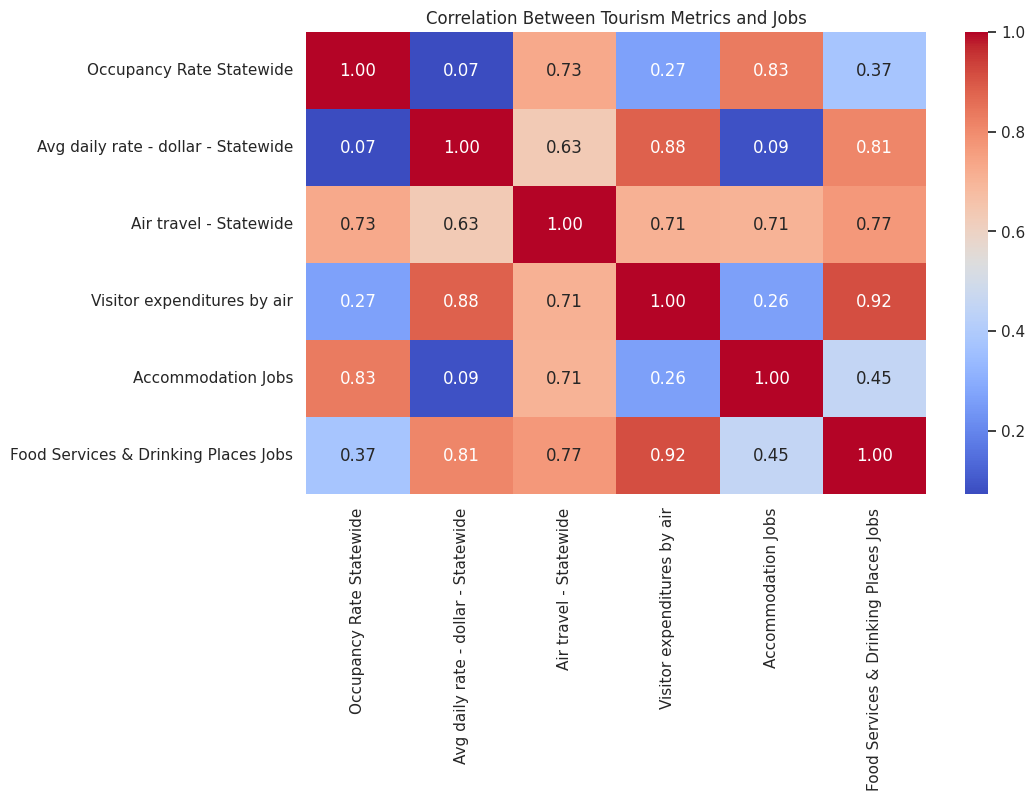

In [ ]:
# Select relevant columns
correlation_data = data[['Occupancy Rate Statewide', 'Avg daily rate - dollar - Statewide',
                         'Air travel - Statewide', 'Visitor expenditures by air',
                         'Accommodation Jobs', 'Food Services & Drinking Places Jobs']]

# Compute correlations
correlation_matrix = correlation_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Tourism Metrics and Jobs')
plt.show()

## Segment 20:Impact of Disasters on Employment

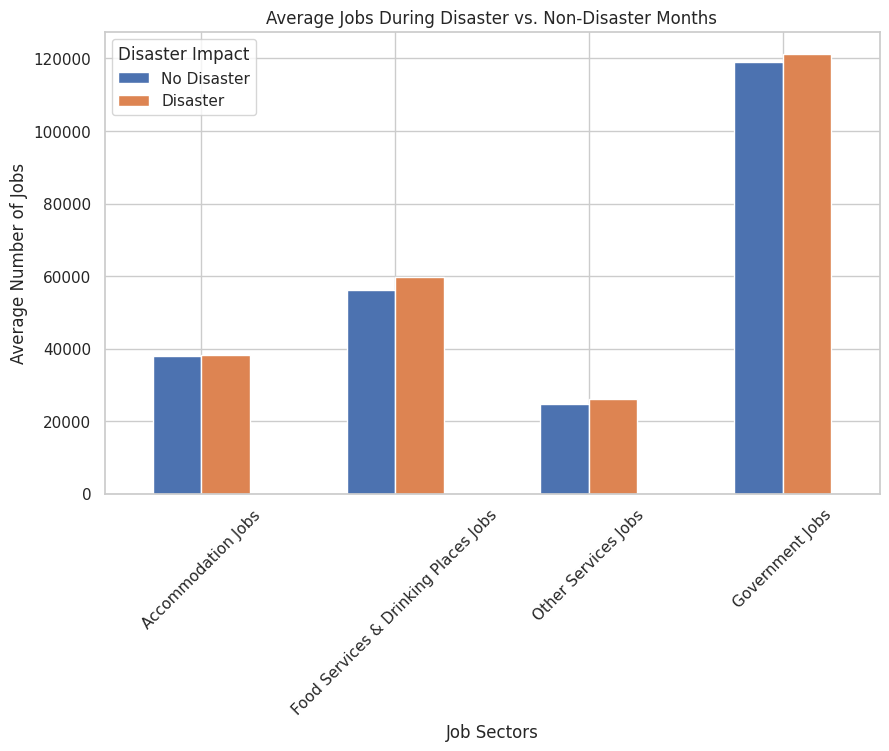

In [ ]:
# Calculate average jobs during disaster and non-disaster months
data['Disaster Impact'] = data['Total no of Disaster'] > 0
disaster_jobs = data.groupby('Disaster Impact')[sector_jobs].mean()

# Plot disaster impact
disaster_jobs.T.plot(kind='bar', figsize=(10, 6))
plt.title('Average Jobs During Disaster vs. Non-Disaster Months')
plt.xlabel('Job Sectors')
plt.ylabel('Average Number of Jobs')
plt.xticks(rotation=45)
plt.legend(['No Disaster', 'Disaster'], title='Disaster Impact')
plt.grid(True)
plt.show()

# Segment 21: Seasonal Trends Analysis for Accommodation Jobs

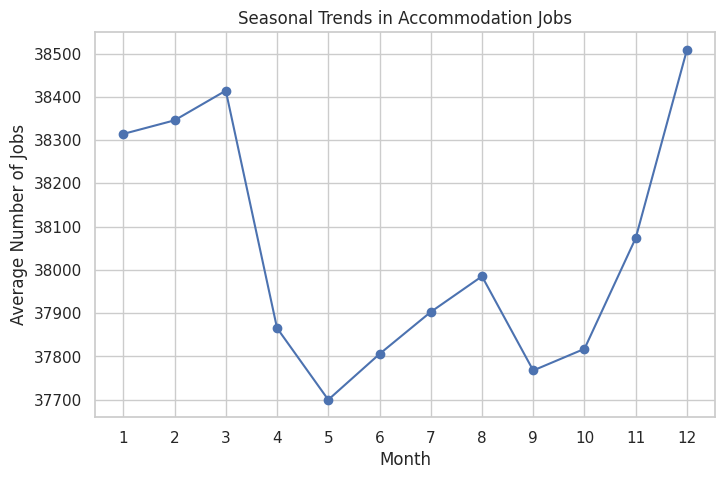

In [ ]:
# Monthly trend analysis for Accommodation Jobs
monthly_jobs = data.groupby('Month')['Accommodation Jobs'].mean()

# Plot monthly trends
plt.figure(figsize=(8, 5))
plt.plot(monthly_jobs.index, monthly_jobs, marker='o')
plt.title('Seasonal Trends in Accommodation Jobs')
plt.xlabel('Month')
plt.ylabel('Average Number of Jobs')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

# Segment 22: Linear Regression Model for Accommodation Jobs Prediction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data for prediction
X = data[['Occupancy Rate Statewide', 'Avg daily rate - dollar - Statewide', 'Air travel - Statewide']]
y = data['Accommodation Jobs'].fillna(0)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

# Display coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Mean Squared Error: 7953661.234981697
R-squared: 0.7582560846493422
                                     Coefficient
Occupancy Rate Statewide              156.847331
Avg daily rate - dollar - Statewide   -20.165502
Air travel - Statewide                  0.017946


# Segment 23: Refined Linear Regression Model for Accommodation Jobs Prediction

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Select features and target
features = ['Occupancy Rate Statewide', 'Avg daily rate - dollar - Statewide',
            'Air travel - Statewide', 'Visitor expenditures by air']
target = 'Accommodation Jobs'

# Drop rows with missing values in selected columns
data_cleaned = data.dropna(subset=features + [target])

X = data_cleaned[features]
y = data_cleaned[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Display coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Mean Squared Error: 8054767.669281106
R-squared: 0.6064281444288941
                                     Coefficient
Occupancy Rate Statewide              149.504278
Avg daily rate - dollar - Statewide   -24.455176
Air travel - Statewide                  0.020924
Visitor expenditures by air             0.000516


# Segment 24: Time Series Analysis and SARIMA Forecasting for Accommodation Jobs

<ipython-input-13-2f4cd3d2fd97>:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts_data = data['Accommodation Jobs'].fillna(method='ffill')  # Fill missing values if any


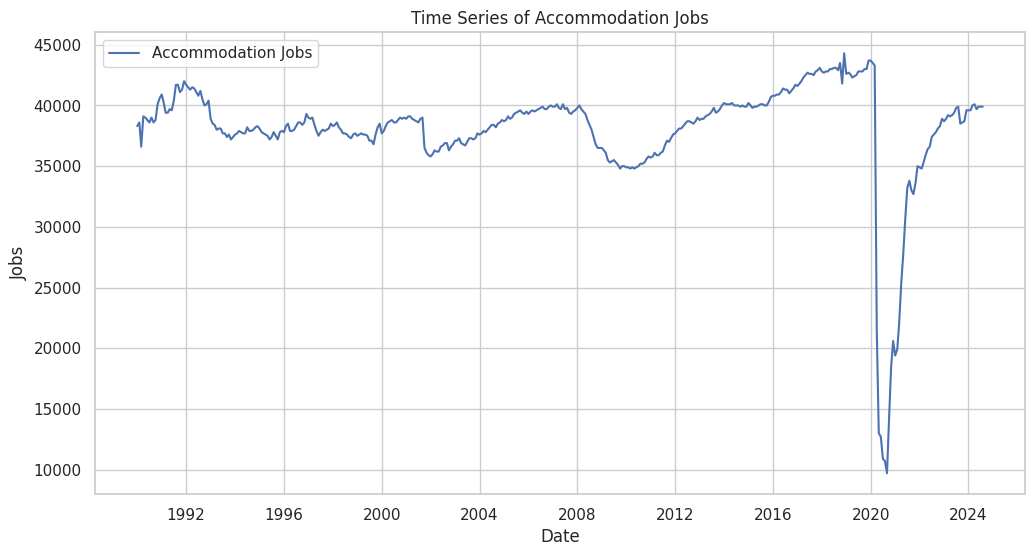

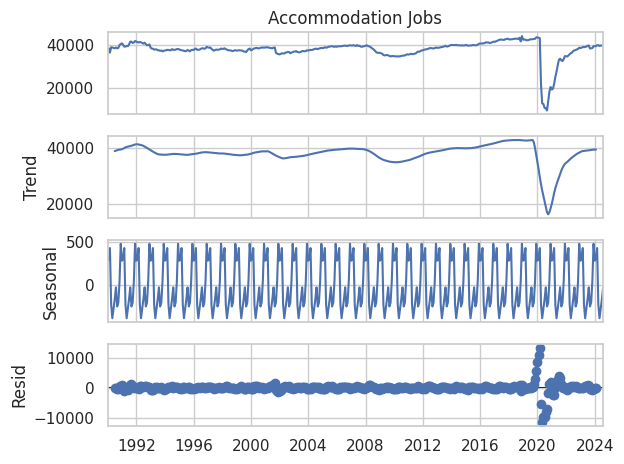

ADF Statistic: -4.6427417332685
p-value: 0.00010766000349328766
The data is stationary.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                 Accommodation Jobs   No. Observations:                  416
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3511.686
Date:                            Thu, 21 Nov 2024   AIC                           7033.372
Time:                                    13:48:22   BIC                           7053.367
Sample:                                01-01-1990   HQIC                          7041.288
                                     - 08-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1897      0.166      1.142      0.253      -0.136       0.515
ma.L1          0.0911      0.168   

<ipython-input-13-2f4cd3d2fd97>:60: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(ts_data.index[-1], periods=forecast_steps + 1, freq='M')[1:]


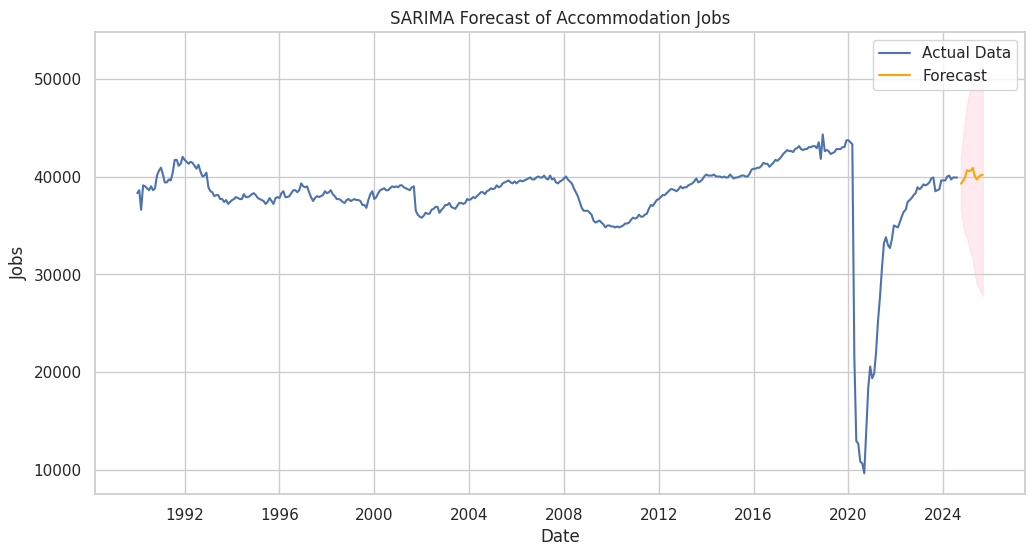

Mean Squared Error: 558854.6119779899
Mean Absolute Error: 613.3568784235789


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/hawaii/Final_Output_Statewide - employmentData & Expenditure 1 (2).xlsx'
data = pd.read_excel(file_path)

# Create a datetime index
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))
data.set_index('Date', inplace=True)

# Select the target column (Accommodation Jobs)
ts_data = data['Accommodation Jobs'].fillna(method='ffill')  # Fill missing values if any

# Visualize the time series
plt.figure(figsize=(12, 6))
plt.plot(ts_data, label='Accommodation Jobs')
plt.title('Time Series of Accommodation Jobs')
plt.xlabel('Date')
plt.ylabel('Jobs')
plt.legend()
plt.show()

# Decompose the time series (optional)
decomposition = seasonal_decompose(ts_data, model='additive', period=12)
decomposition.plot()
plt.show()

# Check for stationarity using Augmented Dickey-Fuller test
result = adfuller(ts_data)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
if result[1] > 0.05:
    print("The data is non-stationary. Differencing is required.")
    ts_data_diff = ts_data.diff().dropna()
else:
    print("The data is stationary.")
    ts_data_diff = ts_data

# Fit a SARIMA model
# Define SARIMA order (p, d, q) x (P, D, Q, m)
sarima_order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

model = SARIMAX(ts_data_diff, order=sarima_order, seasonal_order=seasonal_order)
sarima_result = model.fit(disp=False)

# Print summary
print(sarima_result.summary())

# Forecast future values
forecast_steps = 12  # Forecast next 12 months
forecast = sarima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(ts_data.index[-1], periods=forecast_steps + 1, freq='M')[1:]
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(ts_data, label='Actual Data')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='orange')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('SARIMA Forecast of Accommodation Jobs')
plt.xlabel('Date')
plt.ylabel('Jobs')
plt.legend()
plt.show()

# Evaluate model
y_true = ts_data[-forecast_steps:]
y_pred = forecast_mean[:len(y_true)]
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
